In [1]:

import pandas as pd
import numpy as np

In [2]:
pd.options.display.max_rows = 100

In [3]:
users_full = pd.read_csv("users.csv")
users_full.info()
print(users_full)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   employee_name    4000 non-null   object
 1   user_id          4000 non-null   object
 2   email            4000 non-null   object
 3   role             4000 non-null   object
 4   projects         683 non-null    object
 5   business_unit    4000 non-null   int64 
 6   functional_unit  3998 non-null   object
 7   department       3978 non-null   object
 8   team             3842 non-null   object
 9   supervisor       3999 non-null   object
 10  start_date       4000 non-null   object
 11  end_date         4000 non-null   object
dtypes: int64(1), object(11)
memory usage: 375.1+ KB
                  employee_name  user_id                               email  \
0      Nicholas Fletcher Pruitt  NFP2441   Nicholas.Fletcher.Pruitt@dtaa.com   
1         Abraham Dante Rodgers  ADR1517      Abra

Extracting employee data for the following Departments for functional unit 2 i.e. Research and Engineering:   

1.Engineering 

2.Software Management


In [4]:
#Reading users.csv file & selecting the relevant columns of user_id, functional_unit & department
users_full = pd.read_csv("users.csv")
users1 = users_full[["user_id", "functional_unit", "department"]]
users = users1[users1.functional_unit == "2 - ResearchAndEngineering_Commercial"]
users = users[(users.department != "2 - Research")]
users = users[(users.department != "4 - Engineering")]
users = users[(users.department != "1 - ProjectManagement")]
users = pd.DataFrame(users)
users = users.dropna(axis = 0)
users.info()
users

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 10 to 3927
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          163 non-null    object
 1   functional_unit  163 non-null    object
 2   department       163 non-null    object
dtypes: object(3)
memory usage: 5.1+ KB


user_id                        functional_unit              department
10    LOP1708  2 - ResearchAndEngineering_Commercial  3 - SoftwareManagement
39    BRH1107  2 - ResearchAndEngineering_Commercial  3 - SoftwareManagement
47    OAS0991  2 - ResearchAndEngineering_Commercial  3 - SoftwareManagement
54    UDW0487  2 - ResearchAndEngineering_Commercial  3 - SoftwareManagement
77    SLM1119  2 - ResearchAndEngineering_Commercial  3 - SoftwareManagement
...       ...                                    ...                     ...
3839  VAB1102  2 - ResearchAndEngineering_Commercial  3 - SoftwareManagement
3876  MMJ0070  2 - ResearchAndEngineering_Commercial  3 - SoftwareManagement
3884  BNF1110  2 - ResearchAndEngineering_Commercial  3 - SoftwareManagement
3886  ISH0079  2 - ResearchAndEngineering_Commercial  3 - SoftwareManagement
3927  VKA1118  2 - ResearchAndEngineering_Commercial  3 - SoftwareManagement

[163 rows x 3 columns]

In [5]:
#reading device.csv file
device = pd.read_csv("device.csv")
type(device)
device.info();device.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551828 entries, 0 to 1551827
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   id         1551828 non-null  object
 1   date       1551828 non-null  object
 2   user       1551828 non-null  object
 3   pc         1551828 non-null  object
 4   file_tree  778354 non-null   object
 5   activity   1551828 non-null  object
dtypes: object(6)
memory usage: 71.0+ MB


id                 date     user       pc  \
0  {Z2Q8-K3AV28BE-9353JIRT}  01/02/2010 07:17:18  SDH2394  PC-5849   
1  {C7F1-G7LE60RU-2483DAXS}  01/02/2010 07:22:42  JKS2444  PC-6961   
2  {T9A4-D4RV69OF-1704NINW}  01/02/2010 07:31:42  CBA1023  PC-1570   
3  {S8L0-O6QQ15NL-0636OYNV}  01/02/2010 07:33:28  GNT0221  PC-6427   
4  {U0F1-R1FX27FM-6954TTVU}  01/02/2010 07:33:55  JKS2444  PC-6961   

                                           file_tree    activity  
0                          R:\;R:\22B5gX4;R:\SDH2394     Connect  
1                                     R:\;R:\JKS2444     Connect  
2  R:\;R:\42gY283;R:\48rr4y2;R:\59ntt61;R:\76xCQG...     Connect  
3                                     R:\;R:\GNT0221     Connect  
4                                                NaN  Disconnect

In [6]:
#reading file.csv file
file = pd.read_csv("file.csv")
type(file)
file.info();file.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014883 entries, 0 to 2014882
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   id                    object
 1   date                  object
 2   user                  object
 3   pc                    object
 4   filename              object
 5   activity              object
 6   to_removable_media    bool  
 7   from_removable_media  bool  
 8   content               object
dtypes: bool(2), object(7)
memory usage: 111.4+ MB


id                 date     user       pc  \
0  {F3E2-X3MV05YQ-3516SZDT}  01/02/2010 07:19:41  SDH2394  PC-5849   
1  {I6N1-Z7VL92UY-8715ESKQ}  01/02/2010 07:21:30  SDH2394  PC-5849   
2  {G4X5-J7MH70FV-8936QVSB}  01/02/2010 07:22:11  SDH2394  PC-5849   
3  {M2M7-Z5ST21EU-6704NSKO}  01/02/2010 07:24:06  SDH2394  PC-5849   
4  {R0A9-O9XB25PE-9236MALV}  01/02/2010 07:24:45  SDH2394  PC-5849   

                  filename    activity  to_removable_media  \
0          R:\60WBQE7S.doc   File Open               False   
1          R:\0VGILDW8.pdf  File Write                True   
2          R:\60WBQE7S.doc   File Copy               False   
3  R:\22B5gX4\H8Y96RRE.doc  File Write                True   
4  R:\SDH2394\7XRCV2N5.pdf   File Copy                True   

   from_removable_media                                            content  
0                  True  D0-CF-11-E0-A1-B1-1A-E1 Ernesztin's brother, L...  
1                 False  25-50-44-46-2D ---- Bengali As do many other T...  
2                  True  D0-CF-11-E0-A1-B1-1A-E1 Ernesztin's brother, L...  
3                 False  D0-CF-11-E0-A1-B1-1A-E1 After the death of his...  
4                 False  25-50-44-46-2D Although he restored some of th...

In [7]:
#reading logon.csv file
logon = pd.read_csv("logon.csv")
type(logon)
logon.info();logon.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3530285 entries, 0 to 3530284
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   id        object
 1   date      object
 2   user      object
 3   pc        object
 4   activity  object
dtypes: object(5)
memory usage: 134.7+ MB


id                 date     user       pc activity
0  {F3X8-Y2GT43DR-4906OHBL}  01/02/2010 02:19:18  DNS1758  PC-0414    Logon
1  {B4Q0-D0GM24KN-3704MAII}  01/02/2010 02:31:12  DNS1758  PC-0414   Logoff
2  {T7J1-D4HK34KV-5476TCIJ}  01/02/2010 02:34:02  DNS1758  PC-5313    Logon
3  {S4Y6-D8MQ05SA-0759HLIS}  01/02/2010 02:53:30  DNS1758  PC-5313   Logoff
4  {F3P0-E7FH78CV-4874FRGZ}  01/02/2010 04:07:31  DNS1758  PC-0012    Logon

In [8]:
#reading psychometric.csv file
psychometric = pd.read_csv("psychometric.csv")
psychometric = psychometric[['employee_name','user_id', 'O', 'C','E','A','N']]
type(psychometric)
psychometric.info();psychometric.head()
psychometric.isna().sum()
psychometric.describe()
psychometric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   employee_name  4000 non-null   object
 1   user_id        4000 non-null   object
 2   O              4000 non-null   int64 
 3   C              4000 non-null   int64 
 4   E              4000 non-null   int64 
 5   A              4000 non-null   int64 
 6   N              4000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 218.9+ KB


employee_name  user_id   O   C   E   A   N
0      Nicholas Fletcher Pruitt  NFP2441  34  39  38  36  21
1         Abraham Dante Rodgers  ADR1517  36  39  13  19  27
2         Medge Wilma Blackburn  MWB4000  27  14  44  22  34
3         Meghan Laurel Salazar  MLS2856  35  49  22  45  28
4              Beau Todd Romero  BTR2026  15  15  41  39  27
...                         ...      ...  ..  ..  ..  ..  ..
3995  Alfreda Jeanette Stephens  AJS0616  33  18  38  44  33
3996        Zachery Oscar Mayer  ZOM0746  43  48  16  34  29
3997    Ginger Jeanette Trevino  GJT1292  46  26  13  35  28
3998     Benjamin Lucian Duncan  BLD2227  39  44  19  43  30
3999        Jarrod Louis Fields  JLF3219  22  41  17  26  37

[4000 rows x 7 columns]

## Data Joining and Cleaning

In [9]:
#Replacing the 'user_id' with 'user' for the purpose for data joining
users_tidy = users.rename(columns = {'user_id': 'user'}, inplace = False)
users_tidy.shape

(163, 3)

In [10]:
#Joining the 'logon' data with the users from 'users_tidy' and removing the 'functional_unit' and 'department' columns from the df as they are irrelevant
#logon_users_tidy
logon_users = pd.merge(logon, users_tidy, on = 'user')
logon_users_tidy = logon_users.drop(columns=['functional_unit', 'department'])
logon_users_tidy.shape
print(logon_users_tidy)

                              id                 date     user       pc  \
0       {P8G9-J4HP25SR-5398XSPY}  01/02/2010 07:03:00  MBA1797  PC-0470   
1       {N0Z1-D2WR53MP-3243QQWE}  01/02/2010 07:31:00  JWM0484  PC-3083   
2       {A6D1-E8FI90QD-3298RMDQ}  01/02/2010 07:50:00  BNF1110  PC-0619   
3       {M5I6-O2VQ75LY-2548HMJM}  01/02/2010 07:51:00  BDR0510  PC-1197   
4       {G4Q0-I4QD16JF-0942UUNP}  01/02/2010 08:00:00  KPB1123  PC-2997   
...                          ...                  ...      ...      ...   
127564  {Y2R3-X4QT97HK-4251MNXY}  05/31/2011 19:58:00  VKA1118  PC-2952   
127565  {N1J0-E6PR23OE-2480LLTZ}  05/31/2011 19:59:00  APB1122  PC-1759   
127566  {R4S1-I1TO93PN-5219MKDH}  05/31/2011 19:59:00  LRV1120  PC-3943   
127567  {E2J1-V6QG09QY-9140ESOE}  05/31/2011 20:00:00  KBG1117  PC-6532   
127568  {U1X8-U1HR49SF-6340VJNC}  05/31/2011 20:06:00  KPB1123  PC-2997   

       activity  
0         Logon  
1         Logon  
2         Logon  
3         Logon  
4        

In [11]:
#Joining the 'device' data with the users from 'users_tidy' and removing the 'functional_unit' and 'department' columns from the df as they are irrelevant
#device_users_tidy
device_users = pd.merge(device, users_tidy, on = 'user')
device_users_tidy = device_users.drop(columns = ['functional_unit', 'department'])
print(device_users_tidy)
print(device_users_tidy.isnull().sum())
device_users_tidy.shape

                             id                 date     user       pc  \
0      {N3A2-P2VF46PJ-1024AHON}  01/02/2010 15:23:02  BDR0510  PC-1197   
1      {Y0H3-D6RX76BA-2562WFUC}  01/02/2010 15:24:30  BDR0510  PC-1197   
2      {N2P8-R1JX44LO-6508LMVQ}  01/02/2010 15:24:56  BDR0510  PC-1197   
3      {X5L8-R2TA65UT-2259ZQKU}  01/02/2010 15:25:51  BDR0510  PC-1197   
4      {W2Q9-S5WG89KB-9082DAEJ}  01/02/2010 15:32:37  BDR0510  PC-1197   
...                         ...                  ...      ...      ...   
41598  {V8J6-L8GP59PY-1501GGBA}  05/31/2011 17:34:52  TVS0520  PC-3367   
41599  {T7S8-V4EH45KG-1001GJRB}  05/31/2011 17:38:18  KEC2465  PC-8017   
41600  {D2O6-Q8TA03FC-7647JKAC}  05/31/2011 17:47:30  XHR2377  PC-4953   
41601  {D0X4-D1OO88NC-1997KIUX}  05/31/2011 17:47:52  KEC2465  PC-8017   
41602  {G5X5-Z9FK84FO-2776MXXP}  05/31/2011 17:50:45  MOS0496  PC-0335   

                       file_tree    activity  
0                 R:\;R:\BDR0510     Connect  
1                

(41603, 6)

In [12]:
#Joining the 'file' data with the users from 'users_tidy' and removing the 'functional_unit' and 'department' columns from the df as they are irrelevant
#file_users_tidy
file_users = pd.merge(file, users_tidy, on = 'user')
file_users_tidy = file_users.drop(columns = ['functional_unit', 'department'])
print(file_users_tidy)
print(file_users_tidy.isnull().sum())
file_users_tidy.shape

                             id                 date     user       pc  \
0      {O8E4-H6XR24MT-9613CBHZ}  01/02/2010 10:18:50  JWM0484  PC-3083   
1      {O0B7-U1WS86IB-2463VZUU}  01/02/2010 10:28:44  JWM0484  PC-3083   
2      {U0Z9-A0XP83XP-1523NUHR}  01/02/2010 11:08:07  KPB1123  PC-2997   
3      {I1Y8-V6XJ10DK-0891IENZ}  01/02/2010 14:29:44  BNF1110  PC-0619   
4      {S5Q2-S2OL28UF-2376AVWV}  01/02/2010 15:23:15  BDR0510  PC-1197   
...                         ...                  ...      ...      ...   
68566  {A4I0-Q8GP13EP-6331NHSP}  05/31/2011 17:42:01  KEC2465  PC-8017   
68567  {I1C7-S9WC35DK-4911NTEK}  05/31/2011 17:43:03  KEC2465  PC-8017   
68568  {I4E4-I6CH09ZQ-8472TQVG}  05/31/2011 17:46:06  KEC2465  PC-8017   
68569  {U2C6-O0LT96AE-0021ZNDJ}  05/31/2011 17:46:56  KEC2465  PC-8017   
68570  {J6M9-M2AJ64TZ-0305FQAC}  05/31/2011 18:46:30  APB1122  PC-1759   

                      filename     activity  to_removable_media  \
0      C:\JWM0484\IHG2PM2I.pdf    File Open 

(68571, 9)

In [13]:
#Joining the 'psychometric' data with the users from 'users_tidy' and removing the 'functional_unit' and 'department' columns from the df as they are irrelevant
#psychometric_users_tidy
psychometric_users = pd.merge(psychometric, users, on = 'user_id')
psychometric_users_tidy = psychometric_users[['employee_name', 'user_id','O', 'C', 'E','A','N']]
print(psychometric_users_tidy)

              employee_name  user_id   O   C   E   A   N
0     Lucius Orlando Patton  LOP1708  20  23  38  42  33
1     Brynne Ramona Hendrix  BRH1107  19  26  18  22  33
2      Odette Aileen Slater  OAS0991  39  21  14  19  30
3         Ulla Daryl Willis  UDW0487  27  24  18  16  26
4      Stella Lila Mcintyre  SLM1119  43  40  23  47  28
..                      ...      ...  ..  ..  ..  ..  ..
158   Vincent Andrew Brewer  VAB1102  46  35  22  17  20
159        Maia Maya Jordan  MMJ0070  13  44  41  27  29
160  Baxter Nicholas Fowler  BNF1110  41  36  42  17  31
161    Isabella Susan Hines  ISH0079  38  18  36  45  29
162    Vivian Katell Alston  VKA1118  26  22  17  47  24

[163 rows x 7 columns]


## Preparating parameters from the data to generate a Bipartite Network Graph for User-PC Relationship

### Full Log Data with both logon and logoff activity, by aggregating the count of each status for the particular user and its associated PC

In [14]:
log_graph = logon_users_tidy[['user', 'pc','activity']]
log_graph_df = log_graph.groupby(['user','pc','activity']).agg(total = pd.NamedAgg(column = 'activity', aggfunc = 'count'))
log_graph_df.head()
log_graph_df = log_graph_df.reset_index()
print(log_graph_df)
log_graph_df.shape


         user       pc activity  total
0     ABK0481  PC-3006   Logoff     34
1     ABK0481  PC-3006    Logon     34
2     ABW0501  PC-3901   Logoff    356
3     ABW0501  PC-3901    Logon    356
4     ACF1806  PC-0275   Logoff    118
...       ...      ...      ...    ...
4963  YBJ0071  PC-1543    Logon    356
4964  YIP1802  PC-9491   Logoff     35
4965  YIP1802  PC-9491    Logon     35
4966  ZER0085  PC-1471   Logoff    356
4967  ZER0085  PC-1471    Logon    356

[4968 rows x 4 columns]


(4968, 4)

### Logoff Activity

In [15]:
#filtering out activity = logoff for creating graph
logoff = log_graph_df.loc[log_graph_df['activity'] == 'Logoff']
print(logoff)
logoff.shape
logoff.isnull().sum()

         user       pc activity  total
0     ABK0481  PC-3006   Logoff     34
2     ABW0501  PC-3901   Logoff    356
4     ACF1806  PC-0275   Logoff    118
6     ADB1105  PC-0057   Logoff      1
8     ADB1105  PC-0230   Logoff      1
...       ...      ...      ...    ...
4958  XHR2377  PC-9958   Logoff      1
4960  XUC1092  PC-9287   Logoff    356
4962  YBJ0071  PC-1543   Logoff    356
4964  YIP1802  PC-9491   Logoff     35
4966  ZER0085  PC-1471   Logoff    356

[2484 rows x 4 columns]


user        0
pc          0
activity    0
total       0
dtype: int64

In [16]:
#generating a list of tuples having 'user', 'pc' and the total count of each user-pc relation for logoff activity
weighted_edges_logoff = [(row['user'], row['pc'], row['total']) for idx, row in logoff.iterrows()] 
weighted_edges_logoff[:10]

[('ABK0481', 'PC-3006', 34),
 ('ABW0501', 'PC-3901', 356),
 ('ACF1806', 'PC-0275', 118),
 ('ADB1105', 'PC-0057', 1),
 ('ADB1105', 'PC-0230', 1),
 ('ADB1105', 'PC-0319', 1),
 ('ADB1105', 'PC-0362', 1),
 ('ADB1105', 'PC-0492', 1),
 ('ADB1105', 'PC-0575', 1),
 ('ADB1105', 'PC-0649', 1)]

### Logon Activity

In [17]:
#filtering out activity = logon for creating graph
logon_data = log_graph_df.loc[log_graph_df['activity'] == 'Logon']
print(logon_data)
logon_data.shape

         user       pc activity  total
1     ABK0481  PC-3006    Logon     34
3     ABW0501  PC-3901    Logon    356
5     ACF1806  PC-0275    Logon    207
7     ADB1105  PC-0057    Logon      1
9     ADB1105  PC-0230    Logon      1
...       ...      ...      ...    ...
4959  XHR2377  PC-9958    Logon      1
4961  XUC1092  PC-9287    Logon    356
4963  YBJ0071  PC-1543    Logon    356
4965  YIP1802  PC-9491    Logon     35
4967  ZER0085  PC-1471    Logon    356

[2484 rows x 4 columns]


(2484, 4)

In [18]:
#generating a list of tuples having 'user', 'pc' and the total count of each user-pc relation for logoff activity
weighted_edges_logon = [(row['user'], row['pc'], row['total']) for idx, row in logon_data.iterrows()] 
weighted_edges_logon[:10]


[('ABK0481', 'PC-3006', 34),
 ('ABW0501', 'PC-3901', 356),
 ('ACF1806', 'PC-0275', 207),
 ('ADB1105', 'PC-0057', 1),
 ('ADB1105', 'PC-0230', 1),
 ('ADB1105', 'PC-0319', 1),
 ('ADB1105', 'PC-0362', 1),
 ('ADB1105', 'PC-0492', 1),
 ('ADB1105', 'PC-0575', 1),
 ('ADB1105', 'PC-0649', 1)]

## Grouping all the users and the pc to provide frequency of a particular pc being accessed by a user

In [19]:
total_user_pc_groupby = log_graph.groupby(['user', 'pc'])['pc'].count()
total_user_pc_groupby.name = "pc_visits_per_user_total" 
total_user_pc_groupby

user     pc     
ABK0481  PC-3006     68
ABW0501  PC-3901    712
ACF1806  PC-0275    325
ADB1105  PC-0057      2
         PC-0230      2
                   ... 
XHR2377  PC-9958      2
XUC1092  PC-9287    712
YBJ0071  PC-1543    712
YIP1802  PC-9491     70
ZER0085  PC-1471    712
Name: pc_visits_per_user_total, Length: 2484, dtype: int64

# Behavioral Analytics for Insider Threat Detection  

## Feature Extraction/Engineering to be used as input parameters to Anomaly Detection Model(s)  

### Graph Analysis: Inter-relationship between users and PCs  

Here, constructing an UNDIRECTED BIPARTITE graph with:

- 'users' and 'pc' as nodes  
- edges representing the relationship between the users and pc(s)  
- edge weights representing the total number of Logoff events  

In [20]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [21]:
#using the logoff dataset as graph parameters, as there are no null values present in this dataset
print(logoff); logoff.shape

         user       pc activity  total
0     ABK0481  PC-3006   Logoff     34
2     ABW0501  PC-3901   Logoff    356
4     ACF1806  PC-0275   Logoff    118
6     ADB1105  PC-0057   Logoff      1
8     ADB1105  PC-0230   Logoff      1
...       ...      ...      ...    ...
4958  XHR2377  PC-9958   Logoff      1
4960  XUC1092  PC-9287   Logoff    356
4962  YBJ0071  PC-1543   Logoff    356
4964  YIP1802  PC-9491   Logoff     35
4966  ZER0085  PC-1471   Logoff    356

[2484 rows x 4 columns]


(2484, 4)

### Creating the graph parameters with logoff dataset

In [22]:
users_nodes = list(logoff['user'].unique())
pc_nodes = list(logoff['pc'].unique())
weighted_edges = [(row['user'], row['pc'], row['total']) for idx, row in logoff.iterrows()]
print(weighted_edges[:10])
type(weighted_edges)
len(weighted_edges)

[('ABK0481', 'PC-3006', 34), ('ABW0501', 'PC-3901', 356), ('ACF1806', 'PC-0275', 118), ('ADB1105', 'PC-0057', 1), ('ADB1105', 'PC-0230', 1), ('ADB1105', 'PC-0319', 1), ('ADB1105', 'PC-0362', 1), ('ADB1105', 'PC-0492', 1), ('ADB1105', 'PC-0575', 1), ('ADB1105', 'PC-0649', 1)]


2484

### Constructing the bipartite graph

In [23]:
graph = nx.Graph()
graph.add_nodes_from(users_nodes, bipartite = 0) # users as nodes
graph.add_nodes_from(pc_nodes, bipartite = 1) # PCs as nodes
graph.add_weighted_edges_from(weighted_edges)

In [24]:
nx.is_connected(graph) #it returns if the graph is fully connected

False

In [25]:
nx.is_bipartite(graph) #it returns if the graph is bipartite in nature

True

<Figure size 7000x8000 with 0 Axes>

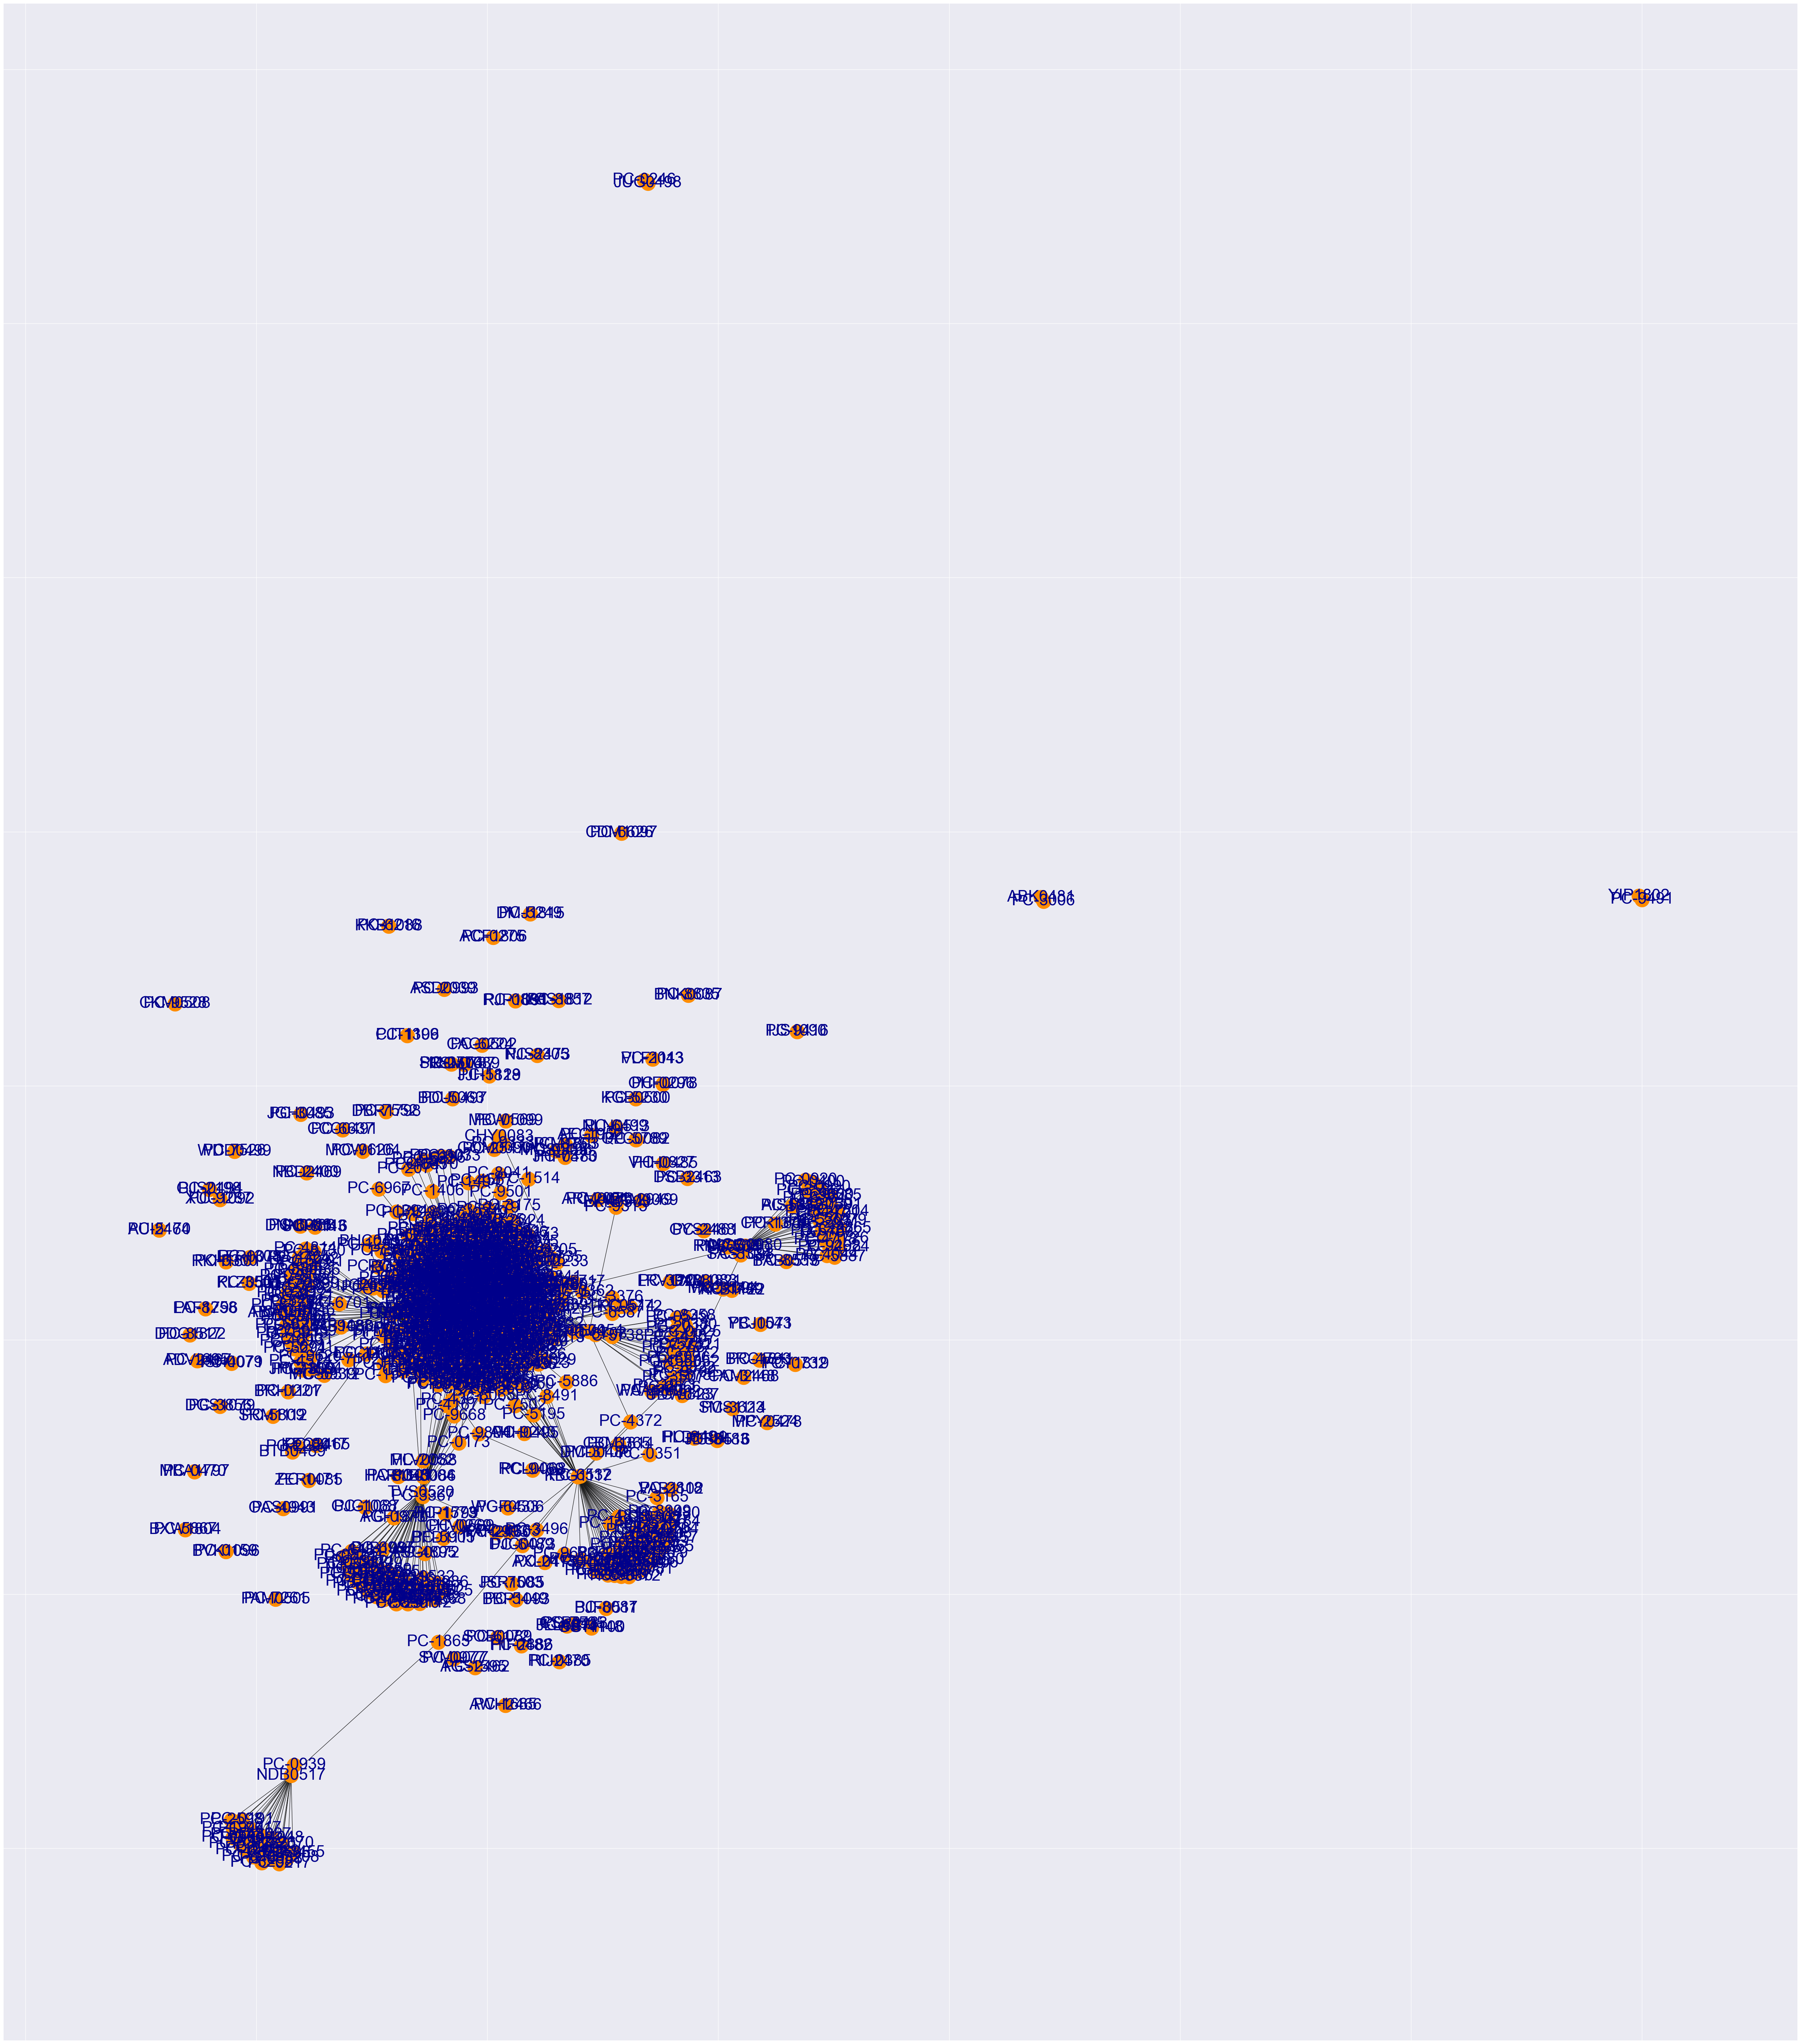

In [197]:
#pos = nx.draw_spectral(graph)
# # # default
# plt.figure(1)
# nx.draw(graph,pos)
# # smaller nodes and fonts
# plt.figure(2)
# nx.draw(graph,pos,node_size=4,font_size=6) 
# # larger figure size
plt.figure(figsize=(70, 80)) 
nx.draw_networkx(graph, node_size = 1000, font_size  = 35, node_color = "darkorange", font_color = "darkblue")
plt.show()

In [27]:
node_degrees = nx.degree(graph)
node_degrees = dict(node_degrees)
type(node_degrees)

dict

In [28]:
node_degrees #The degree of a node is the number of edges connected to the node
user_pc = pd.DataFrame(node_degrees.items(), columns=['user', 'pc_count'])
user_pc.shape
user_pc


user  pc_count
0    ABK0481         1
1    ABW0501         1
2    ACF1806         1
3    ADB1105        44
4    ADV2467         1
..       ...       ...
923  PC-4953         1
924  PC-9287         1
925  PC-1543         1
926  PC-9491         1
927  PC-1471         1

[928 rows x 2 columns]

In [29]:
#getting the user-pc relationship for the users present in logoff activity
user_pc = user_pc[user_pc.user.isin(logoff.user)]
user_pc 

user  pc_count
0    ABK0481         1
1    ABW0501         1
2    ACF1806         1
3    ADB1105        44
4    ADV2467         1
..       ...       ...
158  XHR2377        39
159  XUC1092         1
160  YBJ0071         1
161  YIP1802         1
162  ZER0085         1

[163 rows x 2 columns]

In [30]:
len(logoff['user'].unique())

163

## EDA, Feature Engineering and Stats - Full Logon Dataset

In [31]:
logon_users_tidy.shape

(127569, 5)

In [32]:
#parsing date column to datetime
logon_users_tidy['date'].dtype
logon_users_tidy['date'] = pd.to_datetime(logon_users_tidy['date'])
logon_users_tidy.head()

id                date     user       pc activity
0  {P8G9-J4HP25SR-5398XSPY} 2010-01-02 07:03:00  MBA1797  PC-0470    Logon
1  {N0Z1-D2WR53MP-3243QQWE} 2010-01-02 07:31:00  JWM0484  PC-3083    Logon
2  {A6D1-E8FI90QD-3298RMDQ} 2010-01-02 07:50:00  BNF1110  PC-0619    Logon
3  {M5I6-O2VQ75LY-2548HMJM} 2010-01-02 07:51:00  BDR0510  PC-1197    Logon
4  {G4Q0-I4QD16JF-0942UUNP} 2010-01-02 08:00:00  KPB1123  PC-2997    Logon

In [33]:
logon_users_tidy['date'].dtype

dtype('<M8[ns]')

In [34]:
# extract the time from date column add and store in a new column
logon_users_tidy['time'] = logon_users_tidy['date'].dt.time
logon_users_tidy.head()

id                date     user       pc activity  \
0  {P8G9-J4HP25SR-5398XSPY} 2010-01-02 07:03:00  MBA1797  PC-0470    Logon   
1  {N0Z1-D2WR53MP-3243QQWE} 2010-01-02 07:31:00  JWM0484  PC-3083    Logon   
2  {A6D1-E8FI90QD-3298RMDQ} 2010-01-02 07:50:00  BNF1110  PC-0619    Logon   
3  {M5I6-O2VQ75LY-2548HMJM} 2010-01-02 07:51:00  BDR0510  PC-1197    Logon   
4  {G4Q0-I4QD16JF-0942UUNP} 2010-01-02 08:00:00  KPB1123  PC-2997    Logon   

       time  
0  07:03:00  
1  07:31:00  
2  07:50:00  
3  07:51:00  
4  08:00:00

In [35]:
logon_users_tidy['time'].dtype

dtype('O')

### Subsetting all records for 'Logon' activity


In [36]:
user_logon = logon_users_tidy.loc[logon_users_tidy['activity'] == 'Logon']
user_logon.head()

id                date     user       pc activity  \
0  {P8G9-J4HP25SR-5398XSPY} 2010-01-02 07:03:00  MBA1797  PC-0470    Logon   
1  {N0Z1-D2WR53MP-3243QQWE} 2010-01-02 07:31:00  JWM0484  PC-3083    Logon   
2  {A6D1-E8FI90QD-3298RMDQ} 2010-01-02 07:50:00  BNF1110  PC-0619    Logon   
3  {M5I6-O2VQ75LY-2548HMJM} 2010-01-02 07:51:00  BDR0510  PC-1197    Logon   
4  {G4Q0-I4QD16JF-0942UUNP} 2010-01-02 08:00:00  KPB1123  PC-2997    Logon   

       time  
0  07:03:00  
1  07:31:00  
2  07:50:00  
3  07:51:00  
4  08:00:00

In [37]:
user_logon['date'].dtype

dtype('<M8[ns]')

In [38]:
# added column 'hour' for calculating mean Logon time 
user_logon['hour'] = pd.to_datetime(user_logon['date'], format='%H:%M').dt.hour
user_logon.head()

C:\Users\Piyush\AppData\Local\Temp\ipykernel_25984\2064067571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_logon['hour'] = pd.to_datetime(user_logon['date'], format='%H:%M').dt.hour


id                date     user       pc activity  \
0  {P8G9-J4HP25SR-5398XSPY} 2010-01-02 07:03:00  MBA1797  PC-0470    Logon   
1  {N0Z1-D2WR53MP-3243QQWE} 2010-01-02 07:31:00  JWM0484  PC-3083    Logon   
2  {A6D1-E8FI90QD-3298RMDQ} 2010-01-02 07:50:00  BNF1110  PC-0619    Logon   
3  {M5I6-O2VQ75LY-2548HMJM} 2010-01-02 07:51:00  BDR0510  PC-1197    Logon   
4  {G4Q0-I4QD16JF-0942UUNP} 2010-01-02 08:00:00  KPB1123  PC-2997    Logon   

       time  hour  
0  07:03:00     7  
1  07:31:00     7  
2  07:50:00     7  
3  07:51:00     7  
4  08:00:00     8

In [39]:
# min and max login time of each user
#user_logon_stats_1 = user_logon.groupby
user_logon_stats = user_logon.groupby('user')['time'].agg([min, max]).reset_index()
user_logon_stats.describe()

C:\Users\Piyush\AppData\Local\Temp\ipykernel_25984\2864892358.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  user_logon_stats = user_logon.groupby('user')['time'].agg([min, max]).reset_index()
C:\Users\Piyush\AppData\Local\Temp\ipykernel_25984\2864892358.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  user_logon_stats = user_logon.groupby('user')['time'].agg([min, max]).reset_index()


user       min       max
count       163       163       163
unique      163        23       135
top     ABK0481  07:00:00  08:27:00
freq          1        29         5

In [40]:
#mode login time for each user
pd.set_option('display.max_rows', None)
user_logon.groupby('user')['time'].agg(pd.Series.mode).reset_index() ## some records are multi-modal
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_rows', None)
logon_mode = user_logon.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()
pd.set_option('display.max_rows', 10)
logon_mode

user      time
0    ABK0481  07:48:00
1    ABW0501  07:30:00
2    ACF1806  07:15:00
3    ADB1105  07:19:00
4    ADV2467  09:15:00
..       ...       ...
158  XHR2377  09:15:00
159  XUC1092  08:52:00
160  YBJ0071  08:14:00
161  YIP1802  07:17:00
162  ZER0085  07:35:00

[163 rows x 2 columns]

In [41]:
# calculate average (mean) logon time for each user
logon_mean = user_logon.groupby('user')['hour'].mean().reset_index()
logon_mean['hour'].dtype
logon_mean['hour'] = pd.to_datetime(logon_mean['hour'], format='%H').dt.time
logon_mean.head()


user      hour
0  ABK0481  07:00:00
1  ABW0501  07:00:00
2  ACF1806  08:00:00
3  ADB1105  07:00:00
4  ADV2467  09:00:00

In [42]:
# Adding mode and mean data to user_logon_stats
user_logon_stats['mode'] = logon_mode['time']
user_logon_stats['mean'] = logon_mean['hour']
user_logon_stats.head()


user       min       max      mode      mean
0  ABK0481  07:30:00  07:48:00  07:48:00  07:00:00
1  ABW0501  07:15:00  07:36:00  07:30:00  07:00:00
2  ACF1806  07:00:00  13:22:44  07:15:00  08:00:00
3  ADB1105  00:40:57  23:50:30  07:19:00  07:00:00
4  ADV2467  09:00:00  09:19:00  09:15:00  09:00:00

###  Subsetting all records for 'Logoff' activity


In [43]:
user_logoff = logon_users_tidy.loc[logon_users_tidy['activity'] == 'Logoff']
user_logoff.head()

id                date     user       pc activity  \
12  {L2Y9-X0TP87TD-2501BKGI} 2010-01-02 15:15:00  MBA1797  PC-0470   Logoff   
13  {M2H9-V0SB96HB-4770ZKNJ} 2010-01-02 15:47:00  JWM0484  PC-3083   Logoff   
15  {W3W9-B1QI33BT-4954VUIK} 2010-01-02 16:59:51  KPB1123  PC-5983   Logoff   
16  {P0T5-I9RK81XA-5504PXJB} 2010-01-02 17:57:00  TRH1083  PC-2246   Logoff   
17  {U9F3-C2NG00QI-2300BHAY} 2010-01-02 18:14:00  BDR0510  PC-1197   Logoff   

        time  
12  15:15:00  
13  15:47:00  
15  16:59:51  
16  17:57:00  
17  18:14:00

In [44]:
user_logoff.shape

(58176, 6)

In [45]:
# added a column 'hour' for calculating mean Logoff time 
# time column is an object type and cannot be used for calculating mean
user_logoff['hour'] = pd.to_datetime(user_logoff['date'], format='%H:%M').dt.hour
user_logoff.head()

C:\Users\Piyush\AppData\Local\Temp\ipykernel_25984\3399271920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_logoff['hour'] = pd.to_datetime(user_logoff['date'], format='%H:%M').dt.hour


id                date     user       pc activity  \
12  {L2Y9-X0TP87TD-2501BKGI} 2010-01-02 15:15:00  MBA1797  PC-0470   Logoff   
13  {M2H9-V0SB96HB-4770ZKNJ} 2010-01-02 15:47:00  JWM0484  PC-3083   Logoff   
15  {W3W9-B1QI33BT-4954VUIK} 2010-01-02 16:59:51  KPB1123  PC-5983   Logoff   
16  {P0T5-I9RK81XA-5504PXJB} 2010-01-02 17:57:00  TRH1083  PC-2246   Logoff   
17  {U9F3-C2NG00QI-2300BHAY} 2010-01-02 18:14:00  BDR0510  PC-1197   Logoff   

        time  hour  
12  15:15:00    15  
13  15:47:00    15  
15  16:59:51    16  
16  17:57:00    17  
17  18:14:00    18

In [46]:
# min and max logoff time of each user
user_logoff_stats = user_logoff.groupby('user')['time'].agg([min, max]).reset_index()
user_logoff_stats

C:\Users\Piyush\AppData\Local\Temp\ipykernel_25984\2928781610.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  user_logoff_stats = user_logoff.groupby('user')['time'].agg([min, max]).reset_index()
C:\Users\Piyush\AppData\Local\Temp\ipykernel_25984\2928781610.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  user_logoff_stats = user_logoff.groupby('user')['time'].agg([min, max]).reset_index()


user       min       max
0    ABK0481  15:42:00  16:00:00
1    ABW0501  17:24:00  17:45:00
2    ACF1806  15:04:00  15:30:00
3    ADB1105  00:52:12  20:13:17
4    ADV2467  18:11:00  18:30:00
..       ...       ...       ...
158  XHR2377  03:38:19  23:38:47
159  XUC1092  17:22:00  18:00:00
160  YBJ0071  17:25:00  18:30:00
161  YIP1802  15:13:00  15:28:00
162  ZER0085  17:25:00  17:45:00

[163 rows x 3 columns]

In [47]:
#mode logoff time for each user
pd.set_option('display.max_rows', None)
user_logoff.groupby('user')['time'].agg(pd.Series.mode).reset_index()
pd.set_option('display.max_rows', 5)
logoff_mode = user_logoff.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()
logoff_mode.head()

user      time
0  ABK0481  15:42:00
1  ABW0501  17:28:00
2  ACF1806  15:07:00
3  ADB1105  16:15:00
4  ADV2467  18:12:00

In [48]:
# Calculate mean logff
logoff_mean = user_logoff.groupby('user')['hour'].mean().reset_index()
logoff_mean['hour'] = logoff_mean['hour'].astype(int)
logoff_mean['hour'] = pd.to_datetime(logoff_mean['hour'], format='%H').dt.time
logoff_mean.head()

user      hour
0  ABK0481  15:00:00
1  ABW0501  17:00:00
2  ACF1806  15:00:00
3  ADB1105  14:00:00
4  ADV2467  18:00:00

In [49]:
# Adding mode and mean data to user_logoff_stats
user_logoff_stats['mode'] = logoff_mode['time']
user_logoff_stats['mean'] = logoff_mean['hour']

In [50]:
user_logoff_stats.head()

user       min       max      mode      mean
0  ABK0481  15:42:00  16:00:00  15:42:00  15:00:00
1  ABW0501  17:24:00  17:45:00  17:28:00  17:00:00
2  ACF1806  15:04:00  15:30:00  15:07:00  15:00:00
3  ADB1105  00:52:12  20:13:17  16:15:00  14:00:00
4  ADV2467  18:11:00  18:30:00  18:12:00  18:00:00

## EDA, Feature Engineering and Stats - Device dataset

In [51]:
device_users_tidy

id                 date     user       pc  \
0      {N3A2-P2VF46PJ-1024AHON}  01/02/2010 15:23:02  BDR0510  PC-1197   
1      {Y0H3-D6RX76BA-2562WFUC}  01/02/2010 15:24:30  BDR0510  PC-1197   
...                         ...                  ...      ...      ...   
41601  {D0X4-D1OO88NC-1997KIUX}  05/31/2011 17:47:52  KEC2465  PC-8017   
41602  {G5X5-Z9FK84FO-2776MXXP}  05/31/2011 17:50:45  MOS0496  PC-0335   

            file_tree    activity  
0      R:\;R:\BDR0510     Connect  
1                 NaN  Disconnect  
...               ...         ...  
41601             NaN  Disconnect  
41602             NaN  Disconnect  

[41603 rows x 6 columns]

In [52]:
device_users_tidy['date'].dtype
# extracting the time from date column and mutate a new column
device_users_tidy['time'] = pd.to_datetime(device_users_tidy['date']).dt.time
device_users_tidy.head()

id                 date     user       pc  \
0  {N3A2-P2VF46PJ-1024AHON}  01/02/2010 15:23:02  BDR0510  PC-1197   
1  {Y0H3-D6RX76BA-2562WFUC}  01/02/2010 15:24:30  BDR0510  PC-1197   
2  {N2P8-R1JX44LO-6508LMVQ}  01/02/2010 15:24:56  BDR0510  PC-1197   
3  {X5L8-R2TA65UT-2259ZQKU}  01/02/2010 15:25:51  BDR0510  PC-1197   
4  {W2Q9-S5WG89KB-9082DAEJ}  01/02/2010 15:32:37  BDR0510  PC-1197   

        file_tree    activity      time  
0  R:\;R:\BDR0510     Connect  15:23:02  
1             NaN  Disconnect  15:24:30  
2  R:\;R:\BDR0510     Connect  15:24:56  
3             NaN  Disconnect  15:25:51  
4  R:\;R:\BDR0510     Connect  15:32:37

In [53]:
device_users_tidy['time'].dtype

dtype('O')

In [54]:
# Subset records of Connect & Diconnect activities
device_conn = device_users_tidy.loc[device_users_tidy['activity'] == 'Connect']
device_disconn = device_users_tidy.loc[device_users_tidy['activity'] == 'Disconnect']

In [55]:
print(device_conn.shape)
print(device_disconn.shape)

(20871, 7)
(20732, 7)


### Device Records == 'Connect' 

In [56]:
device_conn.head()

id                 date     user       pc  \
0  {N3A2-P2VF46PJ-1024AHON}  01/02/2010 15:23:02  BDR0510  PC-1197   
2  {N2P8-R1JX44LO-6508LMVQ}  01/02/2010 15:24:56  BDR0510  PC-1197   
4  {W2Q9-S5WG89KB-9082DAEJ}  01/02/2010 15:32:37  BDR0510  PC-1197   
6  {Q9E8-M9DF60OQ-2128URRQ}  01/03/2010 09:45:03  BDR0510  PC-1197   
8  {U8W6-V3PX02YJ-4013SBTM}  01/03/2010 15:24:23  BDR0510  PC-1197   

        file_tree activity      time  
0  R:\;R:\BDR0510  Connect  15:23:02  
2  R:\;R:\BDR0510  Connect  15:24:56  
4  R:\;R:\BDR0510  Connect  15:32:37  
6  R:\;R:\BDR0510  Connect  09:45:03  
8  R:\;R:\BDR0510  Connect  15:24:23

In [57]:
# min max time for connect for each user
device_conn_stats = device_conn.groupby('user')['time'].agg([min, max]).reset_index()
device_conn_stats.head()

C:\Users\Piyush\AppData\Local\Temp\ipykernel_25984\692612824.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  device_conn_stats = device_conn.groupby('user')['time'].agg([min, max]).reset_index()
C:\Users\Piyush\AppData\Local\Temp\ipykernel_25984\692612824.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  device_conn_stats = device_conn.groupby('user')['time'].agg([min, max]).reset_index()


user       min       max
0  ACF1806  07:03:23  15:18:23
1  ADB1105  07:02:57  23:38:50
2  APB1122  07:51:09  19:50:00
3  BDR0510  07:57:57  22:17:34
4  BHE1709  08:23:52  18:25:25

In [58]:
device_conn_stats_1 = device_conn.groupby('user')
device_conn_stats_1.describe()

id                                        date         \
        count unique                       top freq count unique   
user                                                               
ACF1806  1024   1024  {A9E2-X9MD73KM-6821FEDE}    1  1024   1024   
ADB1105  1982   1982  {A7R4-B3UU66LB-2777BDDW}    1  1982   1982   
...       ...    ...                       ...  ...   ...    ...   
XHR2377  3095   3095  {F3M9-K3RR09WE-8305BFST}    1  3095   3095   
XUC1092   346    346  {M1U3-W2PR84IJ-9908DWFP}    1   346    346   

                                     pc         ...  \
                         top freq count unique  ...   
user                                            ...   
ACF1806  01/04/2010 08:20:38    1  1024      1  ...   
ADB1105  01/04/2010 08:36:36    1  1982      1  ...   
...                      ...  ...   ...    ...  ...   
XHR2377  01/04/2010 09:18:59    1  3095      1  ...   
XUC1092  01/04/2010 10:35:37    1   346      1  ...   

                                    file_tree       activity                  \
                                          top  freq    count unique      top   
user                                                                           
ACF1806             R:\;R:\57N64X6;R:\ACF1806  1024     1024      1  Connect   
ADB1105                        R:\;R:\ADB1105  1982     1982      1  Connect   
...                                       ...   ...      ...    ...      ...   
XHR2377  R:\;R:\25r4527;R:\47C7287;R:\XHR2377  3095     3095      1  Connect   
XUC1092  R:\;R:\67FY6v2;R:\718Nr69;R:\XUC1092   346      346      1  Connect   

               time                        
         freq count unique       top freq  
user                                       
ACF1806  1024  1024   1006  12:53:12    2  
ADB1105  1982  1982   1931  08:14:37    3  
...       ...   ...    ...       ...  ...  
XHR2377  3095  3095   2950  17:06:56    3  
XUC1092   346   346    342  12:28:27    2  

[26 rows x 24 columns]

In [59]:
conn_mode = device_conn.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()
pd.set_option('display.max_rows', 10)
conn_mode

user      time
0   ACF1806  12:53:12
1   ADB1105  08:14:37
2   APB1122  14:37:19
3   BDR0510  09:26:51
4   BHE1709  18:01:14
..      ...       ...
21  SOB0089  12:31:20
22  TVS0520  13:24:13
23  WRM0515  08:22:02
24  XHR2377  17:06:56
25  XUC1092  12:28:27

[26 rows x 2 columns]

In [60]:
# Added extract hour and add a new column to device_conn in order to calculate average 'connect' time
device_conn['hour'] = pd.to_datetime(device_conn['date']).dt.hour

C:\Users\Piyush\AppData\Local\Temp\ipykernel_25984\2931618418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_conn['hour'] = pd.to_datetime(device_conn['date']).dt.hour


In [61]:
device_conn.head()

id                 date     user       pc  \
0  {N3A2-P2VF46PJ-1024AHON}  01/02/2010 15:23:02  BDR0510  PC-1197   
2  {N2P8-R1JX44LO-6508LMVQ}  01/02/2010 15:24:56  BDR0510  PC-1197   
4  {W2Q9-S5WG89KB-9082DAEJ}  01/02/2010 15:32:37  BDR0510  PC-1197   
6  {Q9E8-M9DF60OQ-2128URRQ}  01/03/2010 09:45:03  BDR0510  PC-1197   
8  {U8W6-V3PX02YJ-4013SBTM}  01/03/2010 15:24:23  BDR0510  PC-1197   

        file_tree activity      time  hour  
0  R:\;R:\BDR0510  Connect  15:23:02    15  
2  R:\;R:\BDR0510  Connect  15:24:56    15  
4  R:\;R:\BDR0510  Connect  15:32:37    15  
6  R:\;R:\BDR0510  Connect  09:45:03     9  
8  R:\;R:\BDR0510  Connect  15:24:23    15

In [62]:
# mean 'connect'
conn_mean = device_conn.groupby('user')['hour'].mean().reset_index()
conn_mean['hour'] = conn_mean['hour'].astype(int)
conn_mean['hour'] = pd.to_datetime(conn_mean['hour'], format='%H').dt.time

conn_mean.head()

user      hour
0  ACF1806  10:00:00
1  ADB1105  11:00:00
2  APB1122  13:00:00
3  BDR0510  12:00:00
4  BHE1709  12:00:00

In [63]:
# Added mode and mean to device_conn_stats
device_conn_stats['mode'] = conn_mode['time']
device_conn_stats['mean'] = conn_mean['hour']

In [64]:
device_conn_stats.head()

user       min       max      mode      mean
0  ACF1806  07:03:23  15:18:23  12:53:12  10:00:00
1  ADB1105  07:02:57  23:38:50  08:14:37  11:00:00
2  APB1122  07:51:09  19:50:00  14:37:19  13:00:00
3  BDR0510  07:57:57  22:17:34  09:26:51  12:00:00
4  BHE1709  08:23:52  18:25:25  18:01:14  12:00:00

### Device Records == 'Disconnect' 


In [65]:
## Min and Max
device_disconn_stats = device_disconn.groupby('user')['time'].agg([min, max]).reset_index()
device_disconn_stats.head()

C:\Users\Piyush\AppData\Local\Temp\ipykernel_25984\2050205937.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  device_disconn_stats = device_disconn.groupby('user')['time'].agg([min, max]).reset_index()
C:\Users\Piyush\AppData\Local\Temp\ipykernel_25984\2050205937.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  device_disconn_stats = device_disconn.groupby('user')['time'].agg([min, max]).reset_index()


user       min       max
0  ACF1806  07:07:38  15:20:43
1  ADB1105  07:11:02  23:41:09
2  APB1122  08:07:41  20:07:29
3  BDR0510  08:05:33  22:32:00
4  BHE1709  08:36:43  18:40:38

In [66]:
dconn_mode = device_disconn.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()
dconn_mode.head()


user      time
0  ACF1806  14:40:06
1  ADB1105  14:51:04
2  APB1122  15:30:33
3  BDR0510  14:48:36
4  BHE1709  09:47:19

In [67]:
device_disconn.head()


id                 date     user       pc file_tree  \
1  {Y0H3-D6RX76BA-2562WFUC}  01/02/2010 15:24:30  BDR0510  PC-1197       NaN   
3  {X5L8-R2TA65UT-2259ZQKU}  01/02/2010 15:25:51  BDR0510  PC-1197       NaN   
5  {M5W6-E1JW79AT-8282GGSW}  01/02/2010 15:37:16  BDR0510  PC-1197       NaN   
7  {Q4R7-D8CL14XY-5496FNIK}  01/03/2010 10:01:34  BDR0510  PC-1197       NaN   
9  {H1Y6-C9OE13YX-9212JFIK}  01/03/2010 15:27:29  BDR0510  PC-1197       NaN   

     activity      time  
1  Disconnect  15:24:30  
3  Disconnect  15:25:51  
5  Disconnect  15:37:16  
7  Disconnect  10:01:34  
9  Disconnect  15:27:29

In [68]:
# Extracting hour and adding hour column to calculate average time in device_disconn
device_disconn['hour'] = pd.to_datetime(device_disconn['date']).dt.hour
device_disconn.head()

C:\Users\Piyush\AppData\Local\Temp\ipykernel_25984\2153017008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_disconn['hour'] = pd.to_datetime(device_disconn['date']).dt.hour


id                 date     user       pc file_tree  \
1  {Y0H3-D6RX76BA-2562WFUC}  01/02/2010 15:24:30  BDR0510  PC-1197       NaN   
3  {X5L8-R2TA65UT-2259ZQKU}  01/02/2010 15:25:51  BDR0510  PC-1197       NaN   
5  {M5W6-E1JW79AT-8282GGSW}  01/02/2010 15:37:16  BDR0510  PC-1197       NaN   
7  {Q4R7-D8CL14XY-5496FNIK}  01/03/2010 10:01:34  BDR0510  PC-1197       NaN   
9  {H1Y6-C9OE13YX-9212JFIK}  01/03/2010 15:27:29  BDR0510  PC-1197       NaN   

     activity      time  hour  
1  Disconnect  15:24:30    15  
3  Disconnect  15:25:51    15  
5  Disconnect  15:37:16    15  
7  Disconnect  10:01:34    10  
9  Disconnect  15:27:29    15

In [69]:
dconn_mean = device_disconn.groupby('user')['hour'].mean().reset_index()
dconn_mean['hour'] = dconn_mean['hour'].astype(int)
dconn_mean['hour'] = pd.to_datetime(dconn_mean['hour'], format='%H').dt.time
dconn_mean.head()

user      hour
0  ACF1806  10:00:00
1  ADB1105  11:00:00
2  APB1122  13:00:00
3  BDR0510  13:00:00
4  BHE1709  13:00:00

In [70]:
# Adding mode and mean to device_disconn_stats

device_disconn_stats['mode'] = dconn_mode['time']
device_disconn_stats['mean'] = dconn_mean['hour']

In [71]:
device_disconn_stats.head()

user       min       max      mode      mean
0  ACF1806  07:07:38  15:20:43  14:40:06  10:00:00
1  ADB1105  07:11:02  23:41:09  14:51:04  11:00:00
2  APB1122  08:07:41  20:07:29  15:30:33  13:00:00
3  BDR0510  08:05:33  22:32:00  14:48:36  13:00:00
4  BHE1709  08:36:43  18:40:38  09:47:19  13:00:00

## EDA, Feature Engineering and Stats - File dataset

In [72]:
file_users_tidy

id                 date     user       pc  \
0      {O8E4-H6XR24MT-9613CBHZ}  01/02/2010 10:18:50  JWM0484  PC-3083   
1      {O0B7-U1WS86IB-2463VZUU}  01/02/2010 10:28:44  JWM0484  PC-3083   
2      {U0Z9-A0XP83XP-1523NUHR}  01/02/2010 11:08:07  KPB1123  PC-2997   
3      {I1Y8-V6XJ10DK-0891IENZ}  01/02/2010 14:29:44  BNF1110  PC-0619   
4      {S5Q2-S2OL28UF-2376AVWV}  01/02/2010 15:23:15  BDR0510  PC-1197   
...                         ...                  ...      ...      ...   
68566  {A4I0-Q8GP13EP-6331NHSP}  05/31/2011 17:42:01  KEC2465  PC-8017   
68567  {I1C7-S9WC35DK-4911NTEK}  05/31/2011 17:43:03  KEC2465  PC-8017   
68568  {I4E4-I6CH09ZQ-8472TQVG}  05/31/2011 17:46:06  KEC2465  PC-8017   
68569  {U2C6-O0LT96AE-0021ZNDJ}  05/31/2011 17:46:56  KEC2465  PC-8017   
68570  {J6M9-M2AJ64TZ-0305FQAC}  05/31/2011 18:46:30  APB1122  PC-1759   

                      filename     activity  to_removable_media  \
0      C:\JWM0484\IHG2PM2I.pdf    File Open               False   
1              C:\7GA66T81.zip    File Open               False   
2      C:\KPB1123\4PONA54X.pdf    File Open               False   
3      C:\BNF1110\9OKVH9AR.doc    File Open               False   
4      R:\BDR0510\LFHD3J43.txt  File Delete               False   
...                        ...          ...                 ...   
68566  R:\KEC2465\1C5F2K60.pdf  File Delete               False   
68567          C:\P26A1JEN.doc    File Open               False   
68568  R:\KEC2465\ZJ0M9IAK.doc    File Open               False   
68569  R:\KEC2465\ZJ0M9IAK.doc    File Copy               False   
68570  C:\46vyd11\WADD527R.jpg    File Open               False   

       from_removable_media                                            content  
0                     False  25-50-44-46-2D In 2003, Voronezh retiree Valen...  
1                     False  50-4B-03-04-14 As a result, Dorflein became a ...  
2                     False  25-50-44-46-2D The Take Ichi convoy was assemb...  
3                     False  D0-CF-11-E0-A1-B1-1A-E1 Muhammad eventually si...  
4                      True  42-37-33-30 Even his close friend Dora, who ra...  
...                     ...                                                ...  
68566                  True  25-50-44-46-2D I feel some little pride in hav...  
68567                 False  D0-CF-11-E0-A1-B1-1A-E1 Six local political ju...  
68568                  True  D0-CF-11-E0-A1-B1-1A-E1 The families expressed...  
68569                  True  D0-CF-11-E0-A1-B1-1A-E1 The families expressed...  
68570                 False                                             FF-D8   

[68571 rows x 9 columns]

In [73]:
file_users_tidy.shape


(68571, 9)

In [74]:
# Extract date (day) and add a new column to calculate max and mode files copy pey day for each user
# Each user has a normal number of files copy per day

file_users_tidy['date2'] = pd.to_datetime(file_users_tidy['date']).dt.date

In [75]:
file_users_tidy

id                 date     user       pc  \
0      {O8E4-H6XR24MT-9613CBHZ}  01/02/2010 10:18:50  JWM0484  PC-3083   
1      {O0B7-U1WS86IB-2463VZUU}  01/02/2010 10:28:44  JWM0484  PC-3083   
2      {U0Z9-A0XP83XP-1523NUHR}  01/02/2010 11:08:07  KPB1123  PC-2997   
3      {I1Y8-V6XJ10DK-0891IENZ}  01/02/2010 14:29:44  BNF1110  PC-0619   
4      {S5Q2-S2OL28UF-2376AVWV}  01/02/2010 15:23:15  BDR0510  PC-1197   
...                         ...                  ...      ...      ...   
68566  {A4I0-Q8GP13EP-6331NHSP}  05/31/2011 17:42:01  KEC2465  PC-8017   
68567  {I1C7-S9WC35DK-4911NTEK}  05/31/2011 17:43:03  KEC2465  PC-8017   
68568  {I4E4-I6CH09ZQ-8472TQVG}  05/31/2011 17:46:06  KEC2465  PC-8017   
68569  {U2C6-O0LT96AE-0021ZNDJ}  05/31/2011 17:46:56  KEC2465  PC-8017   
68570  {J6M9-M2AJ64TZ-0305FQAC}  05/31/2011 18:46:30  APB1122  PC-1759   

                      filename     activity  to_removable_media  \
0      C:\JWM0484\IHG2PM2I.pdf    File Open               False   
1              C:\7GA66T81.zip    File Open               False   
2      C:\KPB1123\4PONA54X.pdf    File Open               False   
3      C:\BNF1110\9OKVH9AR.doc    File Open               False   
4      R:\BDR0510\LFHD3J43.txt  File Delete               False   
...                        ...          ...                 ...   
68566  R:\KEC2465\1C5F2K60.pdf  File Delete               False   
68567          C:\P26A1JEN.doc    File Open               False   
68568  R:\KEC2465\ZJ0M9IAK.doc    File Open               False   
68569  R:\KEC2465\ZJ0M9IAK.doc    File Copy               False   
68570  C:\46vyd11\WADD527R.jpg    File Open               False   

       from_removable_media  \
0                     False   
1                     False   
2                     False   
3                     False   
4                      True   
...                     ...   
68566                  True   
68567                 False   
68568                  True   
68569                  True   
68570                 False   

                                                 content       date2  
0      25-50-44-46-2D In 2003, Voronezh retiree Valen...  2010-01-02  
1      50-4B-03-04-14 As a result, Dorflein became a ...  2010-01-02  
2      25-50-44-46-2D The Take Ichi convoy was assemb...  2010-01-02  
3      D0-CF-11-E0-A1-B1-1A-E1 Muhammad eventually si...  2010-01-02  
4      42-37-33-30 Even his close friend Dora, who ra...  2010-01-02  
...                                                  ...         ...  
68566  25-50-44-46-2D I feel some little pride in hav...  2011-05-31  
68567  D0-CF-11-E0-A1-B1-1A-E1 Six local political ju...  2011-05-31  
68568  D0-CF-11-E0-A1-B1-1A-E1 The families expressed...  2011-05-31  
68569  D0-CF-11-E0-A1-B1-1A-E1 The families expressed...  2011-05-31  
68570                                             FF-D8   2011-05-31  

[68571 rows x 10 columns]

In [76]:
# to figure out the number of files transfered by a single user per day
files_per_day = file_users_tidy.groupby(['user', 'date2']).size().reset_index()
files_per_day.head()

user       date2  0
0  ABK0481  2010-01-04  1
1  ABK0481  2010-01-11  1
2  ABK0481  2010-01-26  1
3  ABK0481  2010-02-05  1
4  ABK0481  2010-02-08  1

In [77]:
files_per_day.rename(columns={0:'transfers_per_day'}, inplace=True)
files_per_day

user       date2  transfers_per_day
0      ABK0481  2010-01-04                  1
1      ABK0481  2010-01-11                  1
2      ABK0481  2010-01-26                  1
3      ABK0481  2010-02-05                  1
4      ABK0481  2010-02-08                  1
...        ...         ...                ...
11330  YBJ0071  2011-05-10                  1
11331  YBJ0071  2011-05-13                  1
11332  YBJ0071  2011-05-19                  2
11333  YBJ0071  2011-05-23                  2
11334  YBJ0071  2011-05-24                  1

[11335 rows x 3 columns]

In [78]:
# Max file transfers per day
files_max_per_day = files_per_day.groupby('user')['transfers_per_day'].agg(max).reset_index()
files_max_per_day.rename(columns={'transfers_per_day': "max_transfers_per_user"}, inplace=True)
files_max_per_day.head()

C:\Users\Piyush\AppData\Local\Temp\ipykernel_25984\3805250517.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  files_max_per_day = files_per_day.groupby('user')['transfers_per_day'].agg(max).reset_index()


user  max_transfers_per_user
0  ABK0481                       1
1  ABW0501                       1
2  ACF1806                      27
3  ADB1105                      11
4  AEG1121                       3

In [79]:
files_mode_per_day = files_per_day.groupby('user')['transfers_per_day'].agg(lambda x: x.value_counts().index[0]).reset_index()
files_mode_per_day.rename(columns={'transfers_per_day': "mode_transfers_per_user"}, inplace=True)

files_mode_per_day.head()

user  mode_transfers_per_user
0  ABK0481                        1
1  ABW0501                        1
2  ACF1806                       27
3  ADB1105                        1
4  AEG1121                        1

In [80]:
# file copy stats for each user
files_stats = files_mode_per_day
files_stats.rename(columns={files_stats.columns[1]:'mode_transfers_per_user'}, inplace=True)
files_stats

user  mode_transfers_per_user
0    ABK0481                        1
1    ABW0501                        1
2    ACF1806                       27
3    ADB1105                        1
4    AEG1121                        1
..       ...                      ...
124  WGF0506                        1
125  WRM0515                        9
126  XHR2377                        1
127  XUC1092                        3
128  YBJ0071                        1

[129 rows x 2 columns]

In [81]:
file_stats_new = pd.DataFrame()
file_stats_new['user'] = files_stats["user"]
file_stats_new["mode_transfers_per_user"] = files_stats["mode_transfers_per_user"]
file_stats_new["max_transfers_per_user"] = files_max_per_day["max_transfers_per_user"]
file_stats_new

user  mode_transfers_per_user  max_transfers_per_user
0    ABK0481                        1                       1
1    ABW0501                        1                       1
2    ACF1806                       27                      27
3    ADB1105                        1                      11
4    AEG1121                        1                       3
..       ...                      ...                     ...
124  WGF0506                        1                       2
125  WRM0515                        9                      17
126  XHR2377                        1                      15
127  XUC1092                        3                      10
128  YBJ0071                        1                       6

[129 rows x 3 columns]

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Proposed System for Insider Threat Detection 
  
## Based on Anomaly Detection method using Isolated Forest algortihm

In [83]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [84]:
print(user_pc)

        user  pc_count
0    ABK0481         1
1    ABW0501         1
2    ACF1806         1
3    ADB1105        44
4    ADV2467         1
..       ...       ...
158  XHR2377        39
159  XUC1092         1
160  YBJ0071         1
161  YIP1802         1
162  ZER0085         1

[163 rows x 2 columns]


In [85]:
user_pc_count = np.array(user_pc['pc_count'])
user_pc_count

array([  1,   1,   1,  44,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,  94,   1,   1,   1, 102,   1,  22,
         1,   1,   1,   1,   1,   1,   1,   1,  59,   1,   1,   1,   1,
         1,   1,   1,   1,   1,  39,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,  85,   1,   1,   1,   1,   1,   1,   1,  75,   1,
         1,   1,  40,   1,   1,  53,   1,   1,   1,   1,   1,   1,   1,
         1,  86,   1,   1,   1,   1,  22, 102,   1,  72,   1,   1,   1,
         1, 126,   1,   1,   1,   1,  23,   1,  21,   1,   1,   1,  27,
         1,   1,  29, 109,   1,   1,   1,   1,  24,  80,   1,   1, 103,
         1,   1,   1,   1,  36,   1,  45,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1, 111,   1,  25,   1,   1,   1, 104,   1,  88,
       150,   8,  41,  64,   1,   1,   1, 107,   1,   1,   1,   1,   1,
         1, 102,  39,   1,   1,   1,   1], dtype=int64)

In [86]:
user_pc_ct = user_pc_count.reshape(-1,1)
#Now trying to reshape with (-1, 1) . Here the column is provided as 1 but rows as unknown
#user_pc_ct

### Modeling the user_pc relationship using Isolation Forests

In [87]:
forest = IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(user_pc_ct)






IsolationForest(contamination=0.1, n_jobs=1)

In [88]:
#generating the anomaly-score for user-pc relationship
graph_a_score = forest.decision_function(user_pc_ct)
print(graph_a_score[1:10])


[0.20630935 0.20630935 0.02283111 0.20630935 0.20630935 0.20630935
 0.20630935 0.20630935 0.20630935]


Silhouette Score for IsolatedForest on User-PC Relationship :  0.7257829970380444


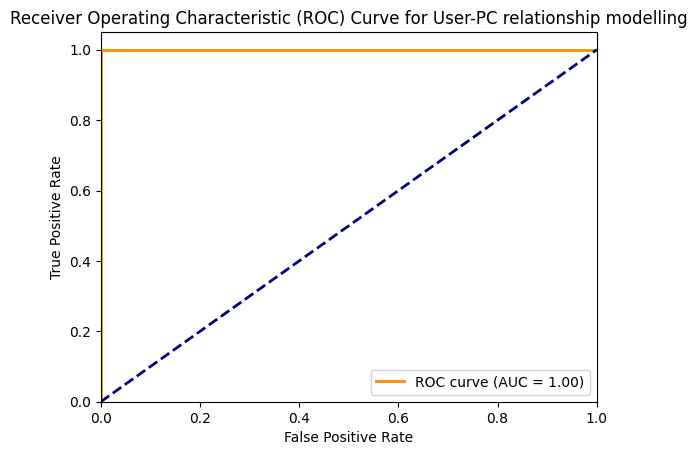

In [89]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

user_pc_predictions = forest.predict(user_pc_ct)
user_pc_score = silhouette_score(user_pc_ct, user_pc_predictions)
print("Silhouette Score for IsolatedForest on User-PC Relationship : ", user_pc_score)
user_pc_labels = np.where(user_pc_predictions == -1, 0, 1)

fpr, tpr, thresholds = roc_curve(user_pc_labels, graph_a_score)

auc_roc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for User-PC relationship modelling')
plt.legend(loc="lower right")
plt.show()


In [90]:
#associating the anomaly scores to the users
graph_result = pd.DataFrame()
graph_result['user'] = user_pc['user']
graph_result['ascore'] = graph_a_score
graph_result

user    ascore
0    ABK0481  0.206309
1    ABW0501  0.206309
2    ACF1806  0.206309
3    ADB1105  0.022831
4    ADV2467  0.206309
..       ...       ...
158  XHR2377  0.065270
159  XUC1092  0.206309
160  YBJ0071  0.206309
161  YIP1802  0.206309
162  ZER0085  0.206309

[163 rows x 2 columns]

In [91]:
outliers = graph_result.loc[graph_result['ascore'] < 0] # OUTLIERS
outliers
#outliers.describe()
#graph_result.sort_values('ascore')


user    ascore
19   BDR0510 -0.038023
34   CAR0992 -0.031528
63   HBC0081 -0.016210
70   IKM1808 -0.040705
87   KBG1117 -0.019801
..       ...       ...
142  TAP1086 -0.003779
143  TIJ1817 -0.217324
144  TKC0514 -0.117974
146  TVS0520 -0.034289
150  VKA1118 -0.003315

[17 rows x 2 columns]

### Anomaly detection for log on/log off actiivity using Isolation Forests

### Log on

In [92]:
user_logon_stats.head()

user       min       max      mode      mean
0  ABK0481  07:30:00  07:48:00  07:48:00  07:00:00
1  ABW0501  07:15:00  07:36:00  07:30:00  07:00:00
2  ACF1806  07:00:00  13:22:44  07:15:00  08:00:00
3  ADB1105  00:40:57  23:50:30  07:19:00  07:00:00
4  ADV2467  09:00:00  09:19:00  09:15:00  09:00:00

In [93]:
user_logon_stats['min'].dtype


dtype('O')

In [94]:
user_logon_stats['min'][1].hour


7

In [95]:
## sklearn algorithms do not take dates as input parameters. 
## hence need to convert the time object into numerical values. 
# Function to convert datetime 'time' to time in seconds

def dtt2timestamp(dtt):
    ts = (dtt.hour * 60 + dtt.minute) * 60 + dtt.second
    return ts

In [96]:
user_logon_stats_sec = user_logon_stats
#user_logon_stats_sec

In [97]:
min_ts = [dtt2timestamp(dtt) for dtt in user_logon_stats_sec['min']] 
max_ts = [dtt2timestamp(dtt) for dtt in user_logon_stats_sec['max']]
mode_ts = [dtt2timestamp(dtt) for dtt in user_logon_stats_sec['mode']]
mean_ts = [dtt2timestamp(dtt) for dtt in user_logon_stats_sec['mean']]



In [98]:
user_logon_stats_sec['min_ts'] = min_ts
user_logon_stats_sec['max_ts'] = max_ts
user_logon_stats_sec['mode_ts'] = mode_ts
user_logon_stats_sec['mean_ts'] = mean_ts

In [99]:
user_logon_stats_sec.drop(['min', 'max','mode','mean'], axis=1)

user  min_ts  max_ts  mode_ts  mean_ts
0    ABK0481   27000   28080    28080    25200
1    ABW0501   26100   27360    27000    25200
2    ACF1806   25200   48164    26100    28800
3    ADB1105    2457   85830    26340    25200
4    ADV2467   32400   33540    33300    32400
..       ...     ...     ...      ...      ...
158  XHR2377    1913   77373    33300    39600
159  XUC1092   30600   32460    31920    28800
160  YBJ0071   28800   32640    29640    28800
161  YIP1802   25200   26220    26220    25200
162  ZER0085   26100   27300    27300    25200

[163 rows x 5 columns]

### Log off

In [100]:
user_logoff_stats.head()

user       min       max      mode      mean
0  ABK0481  15:42:00  16:00:00  15:42:00  15:00:00
1  ABW0501  17:24:00  17:45:00  17:28:00  17:00:00
2  ACF1806  15:04:00  15:30:00  15:07:00  15:00:00
3  ADB1105  00:52:12  20:13:17  16:15:00  14:00:00
4  ADV2467  18:11:00  18:30:00  18:12:00  18:00:00

In [101]:
user_logoff_stats['min'][1].hour


17

In [102]:
user_logoff_stats_sec = user_logoff_stats

In [103]:
min_ts = [dtt2timestamp(dtt) for dtt in user_logoff_stats_sec['min']] 
max_ts = [dtt2timestamp(dtt) for dtt in user_logoff_stats_sec['max']]
mode_ts = [dtt2timestamp(dtt) for dtt in user_logoff_stats_sec['mode']]
mean_ts = [dtt2timestamp(dtt) for dtt in user_logoff_stats_sec['mean']]

In [104]:
user_logoff_stats_sec['min_ts'] = min_ts
user_logoff_stats_sec['max_ts'] = max_ts
user_logoff_stats_sec['mode_ts'] = mode_ts
user_logoff_stats_sec['mean_ts'] = mean_ts

In [105]:
user_logoff_stats_sec.drop(['min', 'max','mode','mean'], axis=1)

user  min_ts  max_ts  mode_ts  mean_ts
0    ABK0481   56520   57600    56520    54000
1    ABW0501   62640   63900    62880    61200
2    ACF1806   54240   55800    54420    54000
3    ADB1105    3132   72797    58500    50400
4    ADV2467   65460   66600    65520    64800
..       ...     ...     ...      ...      ...
158  XHR2377   13099   85127    65700    61200
159  XUC1092   62520   64800    63900    61200
160  YBJ0071   62700   66600    64980    61200
161  YIP1802   54780   55680    54840    54000
162  ZER0085   62700   63900    63000    61200

[163 rows x 5 columns]

In [106]:
# combined logon/logoff data for IForest input

log_on_off_stats = pd.DataFrame()

log_on_off_stats['user'] = user_logon_stats_sec['user']

log_on_off_stats['on_min_ts'] = user_logon_stats['min_ts']
log_on_off_stats['on_max_ts'] = user_logon_stats['max_ts']
log_on_off_stats['on_mode_ts'] = user_logon_stats['mode_ts']
log_on_off_stats['on_mean_ts'] = user_logon_stats['mean_ts']

log_on_off_stats['off_min_ts'] = user_logoff_stats['min_ts']
log_on_off_stats['off_max_ts'] = user_logoff_stats['max_ts']
log_on_off_stats['off_mode_ts'] = user_logoff_stats['mode_ts']
log_on_off_stats['off_mean_ts'] = user_logoff_stats['mean_ts']

log_on_off_stats

user  on_min_ts  on_max_ts  on_mode_ts  on_mean_ts  off_min_ts  \
0    ABK0481      27000      28080       28080       25200       56520   
1    ABW0501      26100      27360       27000       25200       62640   
2    ACF1806      25200      48164       26100       28800       54240   
3    ADB1105       2457      85830       26340       25200        3132   
4    ADV2467      32400      33540       33300       32400       65460   
..       ...        ...        ...         ...         ...         ...   
158  XHR2377       1913      77373       33300       39600       13099   
159  XUC1092      30600      32460       31920       28800       62520   
160  YBJ0071      28800      32640       29640       28800       62700   
161  YIP1802      25200      26220       26220       25200       54780   
162  ZER0085      26100      27300       27300       25200       62700   

     off_max_ts  off_mode_ts  off_mean_ts  
0         57600        56520        54000  
1         63900        62880        61200  
2         55800        54420        54000  
3         72797        58500        50400  
4         66600        65520        64800  
..          ...          ...          ...  
158       85127        65700        61200  
159       64800        63900        61200  
160       66600        64980        61200  
161       55680        54840        54000  
162       63900        63000        61200  

[163 rows x 9 columns]

### Modeling logon/logoff relationship using Isolation Forests

In [107]:
# input array
log_stats = log_on_off_stats.drop(['user'], axis = 1)
log_stats_matrix = np.asarray(log_stats)
log_stats_matrix

array([[27000, 28080, 28080, ..., 57600, 56520, 54000],
       [26100, 27360, 27000, ..., 63900, 62880, 61200],
       [25200, 48164, 26100, ..., 55800, 54420, 54000],
       ...,
       [28800, 32640, 29640, ..., 66600, 64980, 61200],
       [25200, 26220, 26220, ..., 55680, 54840, 54000],
       [26100, 27300, 27300, ..., 63900, 63000, 61200]], dtype=int64)

In [108]:
log_stats_matrix 
forest = IsolationForest(bootstrap=False, contamination= 0.1 , max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(log_stats_matrix)
#generating the anomaly-score for logon/logoff activity
log_ascore = forest.decision_function(log_stats_matrix)
log_ascore[:10]

array([ 0.10316512,  0.16133536,  0.07339132, -0.06778774,  0.0795526 ,
        0.04686978,  0.07565964,  0.1399213 ,  0.11172191,  0.15332922])

In [109]:
log_ascore.shape

(163,)

In [110]:
user_log_result = pd.DataFrame()
user_log_result['user'] = user_logoff_stats_sec['user']
user_log_result['ascore'] = log_ascore
user_log_result

user    ascore
0    ABK0481  0.103165
1    ABW0501  0.161335
2    ACF1806  0.073391
3    ADB1105 -0.067788
4    ADV2467  0.079553
..       ...       ...
158  XHR2377 -0.126391
159  XUC1092  0.120009
160  YBJ0071  0.156263
161  YIP1802  0.099359
162  ZER0085  0.165342

[163 rows x 2 columns]

In [111]:
user_log_result.loc[user_log_result['ascore'] < 0] ##OUTLIERS


user    ascore
3    ADB1105 -0.067788
10   APB1122 -0.013088
24   BJF0511 -0.019900
27   BRC1811 -0.021618
34   CAR0992 -0.074090
..       ...       ...
121  PLH1807 -0.077659
124  RCL0068 -0.046573
143  TIJ1817 -0.054568
151  VLF1113 -0.044577
158  XHR2377 -0.126391

[17 rows x 2 columns]

## Model with removable media (device) and file transfer stats as input features

### Device == "Connect"

In [112]:
device_conn_stats.head()

user       min       max      mode      mean
0  ACF1806  07:03:23  15:18:23  12:53:12  10:00:00
1  ADB1105  07:02:57  23:38:50  08:14:37  11:00:00
2  APB1122  07:51:09  19:50:00  14:37:19  13:00:00
3  BDR0510  07:57:57  22:17:34  09:26:51  12:00:00
4  BHE1709  08:23:52  18:25:25  18:01:14  12:00:00

In [113]:
device_conn_stats_sec = device_conn_stats
con_min_ts = [dtt2timestamp(dtt) for dtt in device_conn_stats_sec['min']]
con_max_ts = [dtt2timestamp(dtt) for dtt in device_conn_stats_sec['max']]
con_mode_ts = [dtt2timestamp(dtt) for dtt in device_conn_stats_sec['mode']]
con_mean_ts = [dtt2timestamp(dtt) for dtt in device_conn_stats_sec['mean']]

device_conn_stats_sec['min_ts'] = con_min_ts
device_conn_stats_sec['max_ts'] = con_max_ts
device_conn_stats_sec['mode_ts'] = con_mode_ts
device_conn_stats_sec['mean_ts'] = con_mean_ts
device_conn_stats_sec = device_conn_stats_sec.drop(['min', 'max','mode','mean'], axis=1)

In [114]:
device_conn_stats_sec

user  min_ts  max_ts  mode_ts  mean_ts
0   ACF1806   25403   55103    46392    36000
1   ADB1105   25377   85130    29677    39600
2   APB1122   28269   71400    52639    46800
3   BDR0510   28677   80254    34011    43200
4   BHE1709   30232   66325    64874    43200
..      ...     ...     ...      ...      ...
21  SOB0089   28932   64342    45080    43200
22  TVS0520   28083   65499    48253    43200
23  WRM0515   28114   64967    30122    43200
24  XHR2377   32573   85483    61616    46800
25  XUC1092   31449   62705    44907    43200

[26 rows x 5 columns]

## Device == "Disconnect"

In [115]:
device_disconn_stats.head()

user       min       max      mode      mean
0  ACF1806  07:07:38  15:20:43  14:40:06  10:00:00
1  ADB1105  07:11:02  23:41:09  14:51:04  11:00:00
2  APB1122  08:07:41  20:07:29  15:30:33  13:00:00
3  BDR0510  08:05:33  22:32:00  14:48:36  13:00:00
4  BHE1709  08:36:43  18:40:38  09:47:19  13:00:00

In [116]:
device_disconn_stats_sec = device_conn_stats
discon_min_ts = [dtt2timestamp(dtt) for dtt in device_disconn_stats_sec['min']]
discon_max_ts = [dtt2timestamp(dtt) for dtt in device_disconn_stats_sec['max']]
discon_mode_ts = [dtt2timestamp(dtt) for dtt in device_disconn_stats_sec['mode']]
discon_mean_ts = [dtt2timestamp(dtt) for dtt in device_disconn_stats_sec['mean']]

device_disconn_stats_sec['min_ts'] = discon_min_ts
device_disconn_stats_sec['max_ts'] = discon_max_ts
device_disconn_stats_sec['mode_ts'] = discon_mode_ts
device_disconn_stats_sec['mean_ts'] = discon_mean_ts
device_disconn_stats_sec = device_disconn_stats_sec.drop(['min', 'max','mode','mean'], axis=1)
device_disconn_stats_sec

user  min_ts  max_ts  mode_ts  mean_ts
0   ACF1806   25403   55103    46392    36000
1   ADB1105   25377   85130    29677    39600
2   APB1122   28269   71400    52639    46800
3   BDR0510   28677   80254    34011    43200
4   BHE1709   30232   66325    64874    43200
..      ...     ...     ...      ...      ...
21  SOB0089   28932   64342    45080    43200
22  TVS0520   28083   65499    48253    43200
23  WRM0515   28114   64967    30122    43200
24  XHR2377   32573   85483    61616    46800
25  XUC1092   31449   62705    44907    43200

[26 rows x 5 columns]

## Files/Device Stats

In [117]:
file_stats_new.head()

user  mode_transfers_per_user  max_transfers_per_user
0  ABK0481                        1                       1
1  ABW0501                        1                       1
2  ACF1806                       27                      27
3  ADB1105                        1                      11
4  AEG1121                        1                       3

In [118]:
# Combine all the removable media (device) parameters

device_full = pd.DataFrame() # new df

device_full['user'] = device_conn_stats['user']

# connect stats
device_full['con_min_ts'] = device_conn_stats_sec['min_ts']
device_full['con_max_ts'] = device_conn_stats_sec['max_ts']
device_full['con_mode_ts'] = device_conn_stats_sec['mode_ts']
device_full['con_mean_ts'] = device_conn_stats_sec['mean_ts']

# disconnect stats
device_full['dcon_min_ts'] = device_disconn_stats_sec['min_ts']
device_full['dcon_max_ts'] = device_disconn_stats_sec['max_ts']
device_full['dcon_mode_ts'] = device_disconn_stats_sec['mode_ts']
device_full['dcon_mean_ts'] = device_disconn_stats_sec['mean_ts']

# files per day stats
device_full['file_mode'] = file_stats_new['mode_transfers_per_user']
device_full['file_max'] = file_stats_new['max_transfers_per_user']

In [119]:
device_full

user  con_min_ts  con_max_ts  con_mode_ts  con_mean_ts  dcon_min_ts  \
0   ACF1806       25403       55103        46392        36000        25403   
1   ADB1105       25377       85130        29677        39600        25377   
2   APB1122       28269       71400        52639        46800        28269   
3   BDR0510       28677       80254        34011        43200        28677   
4   BHE1709       30232       66325        64874        43200        30232   
..      ...         ...         ...          ...          ...          ...   
21  SOB0089       28932       64342        45080        43200        28932   
22  TVS0520       28083       65499        48253        43200        28083   
23  WRM0515       28114       64967        30122        43200        28114   
24  XHR2377       32573       85483        61616        46800        32573   
25  XUC1092       31449       62705        44907        43200        31449   

    dcon_max_ts  dcon_mode_ts  dcon_mean_ts  file_mode  file_max  
0         55103         46392         36000          1         1  
1         85130         29677         39600          1         1  
2         71400         52639         46800         27        27  
3         80254         34011         43200          1        11  
4         66325         64874         43200          1         3  
..          ...           ...           ...        ...       ...  
21        64342         45080         43200          1         2  
22        65499         48253         43200          1         1  
23        64967         30122         43200          1         2  
24        85483         61616         46800          1         4  
25        62705         44907         43200          1         3  

[26 rows x 11 columns]

### Model fitting

In [120]:
device_full_matrix = device_full.drop(['user'], axis = 1)
device_params = np.asarray(device_full_matrix)
device_params[:10]

array([[25403, 55103, 46392, 36000, 25403, 55103, 46392, 36000,     1,
            1],
       [25377, 85130, 29677, 39600, 25377, 85130, 29677, 39600,     1,
            1],
       [28269, 71400, 52639, 46800, 28269, 71400, 52639, 46800,    27,
           27],
       [28677, 80254, 34011, 43200, 28677, 80254, 34011, 43200,     1,
           11],
       [30232, 66325, 64874, 43200, 30232, 66325, 64874, 43200,     1,
            3],
       [28348, 71734, 33519, 46800, 28348, 71734, 33519, 46800,     1,
           11],
       [25586, 80474, 50054, 39600, 25586, 80474, 50054, 39600,     1,
            2],
       [30813, 64329, 52625, 43200, 30813, 64329, 52625, 43200,     1,
            4],
       [30032, 77049, 30595, 43200, 30032, 77049, 30595, 43200,     1,
           31],
       [27275, 56337, 28989, 39600, 27275, 56337, 28989, 39600,     1,
            4]], dtype=int64)

In [121]:
# fit the model
device_params = device_params 
forest = IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(device_params)

IsolationForest(contamination=0.1, n_jobs=1)

In [122]:
#generating the anomaly-score for device
dev_file_ascore = forest.decision_function(device_params)
dev_file_ascore

array([ 0.075507  ,  0.01265021, -0.01265021,  0.08450697,  0.11361635,
        0.06453375,  0.05008297,  0.166111  ,  0.04222841,  0.06849953,
        0.1393057 ,  0.09747646,  0.15875683,  0.11434204, -0.02134894,
        0.09489633,  0.13790135,  0.15734821,  0.05725311,  0.06089462,
        0.02169118,  0.18078636,  0.16532128,  0.13218972, -0.06976456,
        0.15715287])

In [123]:
dev_file_ascore.shape

(26,)

In [124]:
# Save the result
device_file_full_result = pd.DataFrame()

device_file_full_result['user'] = device_full['user']
device_file_full_result['ascore'] = dev_file_ascore
device_file_full_result

user    ascore
0   ACF1806  0.075507
1   ADB1105  0.012650
2   APB1122 -0.012650
3   BDR0510  0.084507
4   BHE1709  0.113616
..      ...       ...
21  SOB0089  0.180786
22  TVS0520  0.165321
23  WRM0515  0.132190
24  XHR2377 -0.069765
25  XUC1092  0.157153

[26 rows x 2 columns]

In [125]:
device_file_full_result.loc[device_file_full_result['ascore'] < 0] ##OUTLIERS

user    ascore
2   APB1122 -0.012650
14  LOP1708 -0.021349
24  XHR2377 -0.069765

## Anomaly detection with psychometric data

In [126]:
psychometric_users_tidy

employee_name  user_id   O   C   E   A   N
0     Lucius Orlando Patton  LOP1708  20  23  38  42  33
1     Brynne Ramona Hendrix  BRH1107  19  26  18  22  33
2      Odette Aileen Slater  OAS0991  39  21  14  19  30
3         Ulla Daryl Willis  UDW0487  27  24  18  16  26
4      Stella Lila Mcintyre  SLM1119  43  40  23  47  28
..                      ...      ...  ..  ..  ..  ..  ..
158   Vincent Andrew Brewer  VAB1102  46  35  22  17  20
159        Maia Maya Jordan  MMJ0070  13  44  41  27  29
160  Baxter Nicholas Fowler  BNF1110  41  36  42  17  31
161    Isabella Susan Hines  ISH0079  38  18  36  45  29
162    Vivian Katell Alston  VKA1118  26  22  17  47  24

[163 rows x 7 columns]

In [127]:
psychometric_matrix = psychometric_users_tidy.drop(['user_id', 'employee_name'], axis = 1)
psychometric_params = np.asarray(psychometric_matrix)
#psychometric_params

In [128]:
forest = IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(psychometric_params)

IsolationForest(contamination=0.1, n_jobs=1)

In [129]:
#generating the anomaly-score for psychoetric data
psych_ascore = forest.decision_function(psychometric_params)
psych_ascore[:10]

array([ 0.05654901,  0.07563328,  0.08875432,  0.10069995,  0.05738196,
        0.0716517 ,  0.00091606,  0.10986067, -0.02370995, -0.01901661])

In [130]:
psychometric_result = pd.DataFrame()
psychometric_result['user'] = psychometric_users_tidy['user_id']
psychometric_result['ascore'] = psych_ascore
psychometric_result

user    ascore
0    LOP1708  0.056549
1    BRH1107  0.075633
2    OAS0991  0.088754
3    UDW0487  0.100700
4    SLM1119  0.057382
..       ...       ...
158  VAB1102  0.010871
159  MMJ0070  0.003208
160  BNF1110  0.078412
161  ISH0079  0.065550
162  VKA1118  0.048919

[163 rows x 2 columns]

In [131]:
#Outliers present in the psychometric data
psychometric_result.loc[psychometric_result['ascore'] < 0]


user    ascore
8    TKC0514 -0.023710
9    JHP1799 -0.019017
15   HAR1101 -0.024899
41   OJB1095 -0.060716
57   NDB0517 -0.022726
..       ...       ...
107  RIJ2470 -0.019930
131  GYS2461 -0.035072
135  JGH0493 -0.001892
153  HHW2471 -0.006410
157  BXW1804 -0.027393

[17 rows x 2 columns]

# Model with some of input features combined (Graph, Logon/Logoff, and Psychometric data)

In [132]:
df = pd.merge(log_on_off_stats, user_pc, on = 'user')
df

user  on_min_ts  on_max_ts  on_mode_ts  on_mean_ts  off_min_ts  \
0    ABK0481      27000      28080       28080       25200       56520   
1    ABW0501      26100      27360       27000       25200       62640   
2    ACF1806      25200      48164       26100       28800       54240   
3    ADB1105       2457      85830       26340       25200        3132   
4    ADV2467      32400      33540       33300       32400       65460   
..       ...        ...        ...         ...         ...         ...   
158  XHR2377       1913      77373       33300       39600       13099   
159  XUC1092      30600      32460       31920       28800       62520   
160  YBJ0071      28800      32640       29640       28800       62700   
161  YIP1802      25200      26220       26220       25200       54780   
162  ZER0085      26100      27300       27300       25200       62700   

     off_max_ts  off_mode_ts  off_mean_ts  pc_count  
0         57600        56520        54000         1  
1         63900        62880        61200         1  
2         55800        54420        54000         1  
3         72797        58500        50400        44  
4         66600        65520        64800         1  
..          ...          ...          ...       ...  
158       85127        65700        61200        39  
159       64800        63900        61200         1  
160       66600        64980        61200         1  
161       55680        54840        54000         1  
162       63900        63000        61200         1  

[163 rows x 10 columns]

In [133]:
df_1 = pd.merge(df, psychometric, left_on = 'user', right_on = 'user_id')
df_1 = df_1[['user', 'on_min_ts', 'on_max_ts', 'on_mode_ts', 'on_mean_ts',
       'off_min_ts', 'off_max_ts', 'off_mode_ts', 'off_mean_ts', 'pc_count',
       'employee_name', 'user_id', 'O', 'C', 'E', 'A', 'N']]
df_1

user  on_min_ts  on_max_ts  on_mode_ts  on_mean_ts  off_min_ts  \
0    ABK0481      27000      28080       28080       25200       56520   
1    ABW0501      26100      27360       27000       25200       62640   
2    ACF1806      25200      48164       26100       28800       54240   
3    ADB1105       2457      85830       26340       25200        3132   
4    ADV2467      32400      33540       33300       32400       65460   
..       ...        ...        ...         ...         ...         ...   
158  XHR2377       1913      77373       33300       39600       13099   
159  XUC1092      30600      32460       31920       28800       62520   
160  YBJ0071      28800      32640       29640       28800       62700   
161  YIP1802      25200      26220       26220       25200       54780   
162  ZER0085      26100      27300       27300       25200       62700   

     off_max_ts  off_mode_ts  off_mean_ts  pc_count           employee_name  \
0         57600        56520        54000         1        Abbot Bruce Knox   
1         63900        62880        61200         1        Aline Basia Webb   
2         55800        54420        54000         1     Abraham Colt French   
3         72797        58500        50400        44       Abbot Drake Black   
4         66600        65520        64800         1  Armand Devin Velasquez   
..          ...          ...          ...       ...                     ...   
158       85127        65700        61200        39    Xandra Hilary Romero   
159       64800        63900        61200         1    Xerxes Ursula Coffey   
160       66600        64980        61200         1    Yolanda Briar Joyner   
161       55680        54840        54000         1     Yolanda Iona Phelps   
162       63900        63000        61200         1        Zeus Emerson Roy   

     user_id   O   C   E   A   N  
0    ABK0481  43  41  20  40  29  
1    ABW0501  15  34  44  39  25  
2    ACF1806  42  20  40  16  26  
3    ADB1105  39  38  42  37  21  
4    ADV2467  42  39  10  15  27  
..       ...  ..  ..  ..  ..  ..  
158  XHR2377  36  15  22  22  35  
159  XUC1092  33  25  41  29  32  
160  YBJ0071  42  14  35  20  30  
161  YIP1802  23  45  26  41  35  
162  ZER0085  39  37  38  22  23  

[163 rows x 17 columns]

In [134]:
#removing the employee name from the data, to maintain privacy of the users and avoid traceback to the user directly
df_final = df_1.drop(['employee_name', 'user_id'], axis=1)
df_final.head()

user  on_min_ts  on_max_ts  on_mode_ts  on_mean_ts  off_min_ts  \
0  ABK0481      27000      28080       28080       25200       56520   
1  ABW0501      26100      27360       27000       25200       62640   
2  ACF1806      25200      48164       26100       28800       54240   
3  ADB1105       2457      85830       26340       25200        3132   
4  ADV2467      32400      33540       33300       32400       65460   

   off_max_ts  off_mode_ts  off_mean_ts  pc_count   O   C   E   A   N  
0       57600        56520        54000         1  43  41  20  40  29  
1       63900        62880        61200         1  15  34  44  39  25  
2       55800        54420        54000         1  42  20  40  16  26  
3       72797        58500        50400        44  39  38  42  37  21  
4       66600        65520        64800         1  42  39  10  15  27

In [135]:
all_parameters = df_final

## Model fitting - All parameters

In [136]:
#input array
all_parameters_input = all_parameters.drop(['user'], axis = 1)
all_parameters_input

on_min_ts  on_max_ts  on_mode_ts  on_mean_ts  off_min_ts  off_max_ts  \
0        27000      28080       28080       25200       56520       57600   
1        26100      27360       27000       25200       62640       63900   
2        25200      48164       26100       28800       54240       55800   
3         2457      85830       26340       25200        3132       72797   
4        32400      33540       33300       32400       65460       66600   
..         ...        ...         ...         ...         ...         ...   
158       1913      77373       33300       39600       13099       85127   
159      30600      32460       31920       28800       62520       64800   
160      28800      32640       29640       28800       62700       66600   
161      25200      26220       26220       25200       54780       55680   
162      26100      27300       27300       25200       62700       63900   

     off_mode_ts  off_mean_ts  pc_count   O   C   E   A   N  
0          56520        54000         1  43  41  20  40  29  
1          62880        61200         1  15  34  44  39  25  
2          54420        54000         1  42  20  40  16  26  
3          58500        50400        44  39  38  42  37  21  
4          65520        64800         1  42  39  10  15  27  
..           ...          ...       ...  ..  ..  ..  ..  ..  
158        65700        61200        39  36  15  22  22  35  
159        63900        61200         1  33  25  41  29  32  
160        64980        61200         1  42  14  35  20  30  
161        54840        54000         1  23  45  26  41  35  
162        63000        61200         1  39  37  38  22  23  

[163 rows x 14 columns]

In [137]:
forest = IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(all_parameters_input)

IsolationForest(contamination=0.1, n_jobs=1)

In [138]:
#generating the anomaly-score for all parameters
all_parameters_ascore = forest.decision_function(all_parameters_input)
all_parameters_ascore[:10]

array([ 0.11195239,  0.10686246,  0.06242877, -0.04554434,  0.06736208,
        0.05556475,  0.08566012,  0.09508951,  0.12881641,  0.10395856])

<Figure size 1200x1000 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve for all parameters modelling')

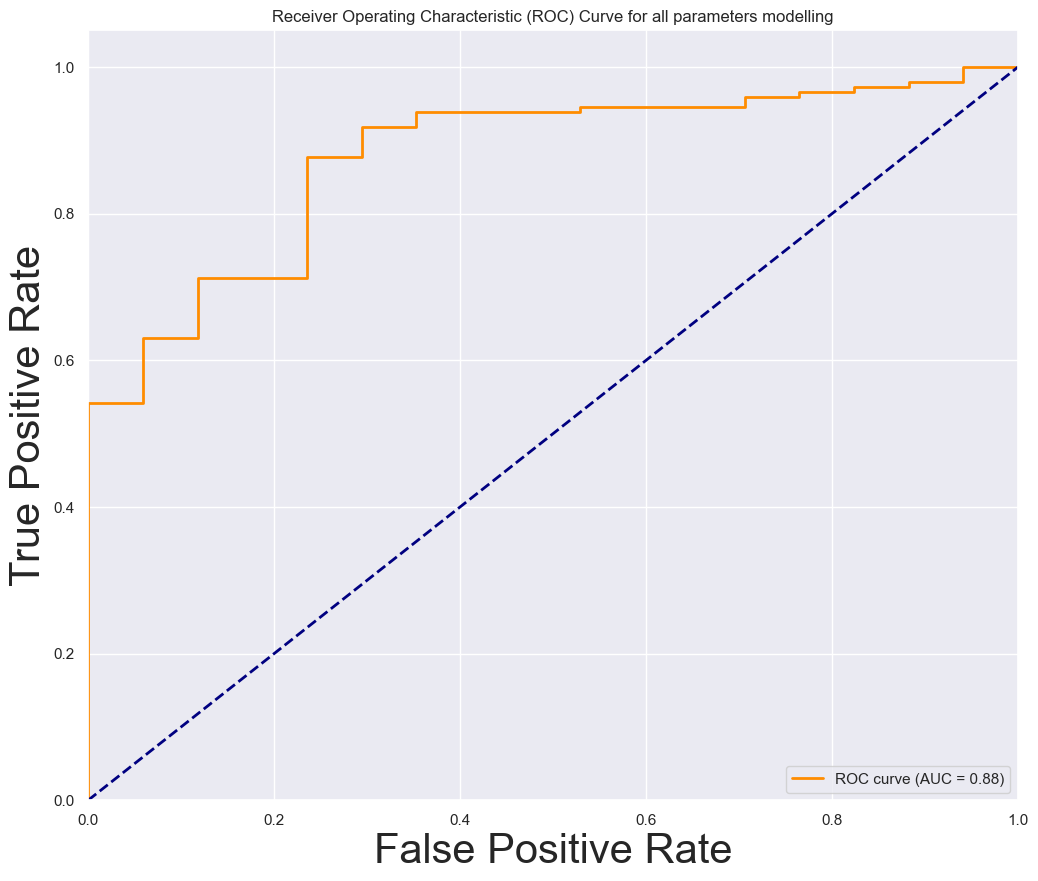

In [204]:
all_parameters_labels = np.where(user_pc_predictions == -1, 0, 1)
fpr, tpr, thresholds = roc_curve(all_parameters_labels, all_parameters_ascore)

auc_roc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for all parameters modelling')
plt.legend(loc="lower right")
plt.show()

In [140]:
all_parameters_result = pd.DataFrame()

all_parameters_result['user'] = df_final['user']
all_parameters_result['ascore'] = all_parameters_ascore
all_parameters_result

user    ascore
0    ABK0481  0.111952
1    ABW0501  0.106862
2    ACF1806  0.062429
3    ADB1105 -0.045544
4    ADV2467  0.067362
..       ...       ...
158  XHR2377 -0.068217
159  XUC1092  0.115587
160  YBJ0071  0.150102
161  YIP1802  0.062718
162  ZER0085  0.135114

[163 rows x 2 columns]

In [141]:
#OUTLIERS
all_parameters_result.loc[all_parameters_result['ascore'] < 0]

user    ascore
3    ADB1105 -0.045544
19   BDR0510 -0.024787
24   BJF0511 -0.052818
27   BRC1811 -0.029431
34   CAR0992 -0.033187
..       ...       ...
121  PLH1807 -0.049615
140  SSA1793 -0.000460
143  TIJ1817 -0.077162
151  VLF1113 -0.037591
158  XHR2377 -0.068217

[17 rows x 2 columns]

## Data Visualization - Evaulating the Isolated Forest model using histograms

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [143]:
print("Anomaly-score based on User-PC relationship\n",graph_result); 
print("Anomaly-score based on psychometric data\n",psychometric_result);
print("Anomaly-score based on device data\n",device_file_full_result); 
print(user_log_result);
print("Anomaly-score based on all paramters\n",all_parameters_result);

Anomaly-score based on User-PC relationship
         user    ascore
0    ABK0481  0.206309
1    ABW0501  0.206309
2    ACF1806  0.206309
3    ADB1105  0.022831
4    ADV2467  0.206309
..       ...       ...
158  XHR2377  0.065270
159  XUC1092  0.206309
160  YBJ0071  0.206309
161  YIP1802  0.206309
162  ZER0085  0.206309

[163 rows x 2 columns]
Anomaly-score based on psychometric data
         user    ascore
0    LOP1708  0.056549
1    BRH1107  0.075633
2    OAS0991  0.088754
3    UDW0487  0.100700
4    SLM1119  0.057382
..       ...       ...
158  VAB1102  0.010871
159  MMJ0070  0.003208
160  BNF1110  0.078412
161  ISH0079  0.065550
162  VKA1118  0.048919

[163 rows x 2 columns]
Anomaly-score based on device data
        user    ascore
0   ACF1806  0.075507
1   ADB1105  0.012650
2   APB1122 -0.012650
3   BDR0510  0.084507
4   BHE1709  0.113616
..      ...       ...
21  SOB0089  0.180786
22  TVS0520  0.165321
23  WRM0515  0.132190
24  XHR2377 -0.069765
25  XUC1092  0.157153

[26 rows x 2

<Axes: xlabel='user', ylabel='ascore'>

<Axes: xlabel='user', ylabel='ascore'>

<Axes: xlabel='user', ylabel='ascore'>

<Axes: xlabel='user', ylabel='ascore'>

<Axes: xlabel='user', ylabel='ascore'>

Text(0.5, 1.0, 'Anomaly score for different set of parameters ')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

(array([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3]),
 [Text(0, -0.30000000000000004, '−0.3'),
  Text(0, -0.20000000000000004, '−0.2'),
  Text(0, -0.10000000000000003, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.09999999999999998, '0.1'),
  Text(0, 0.19999999999999996, '0.2'),
  Text(0, 0.30000000000000004, '0.3')])

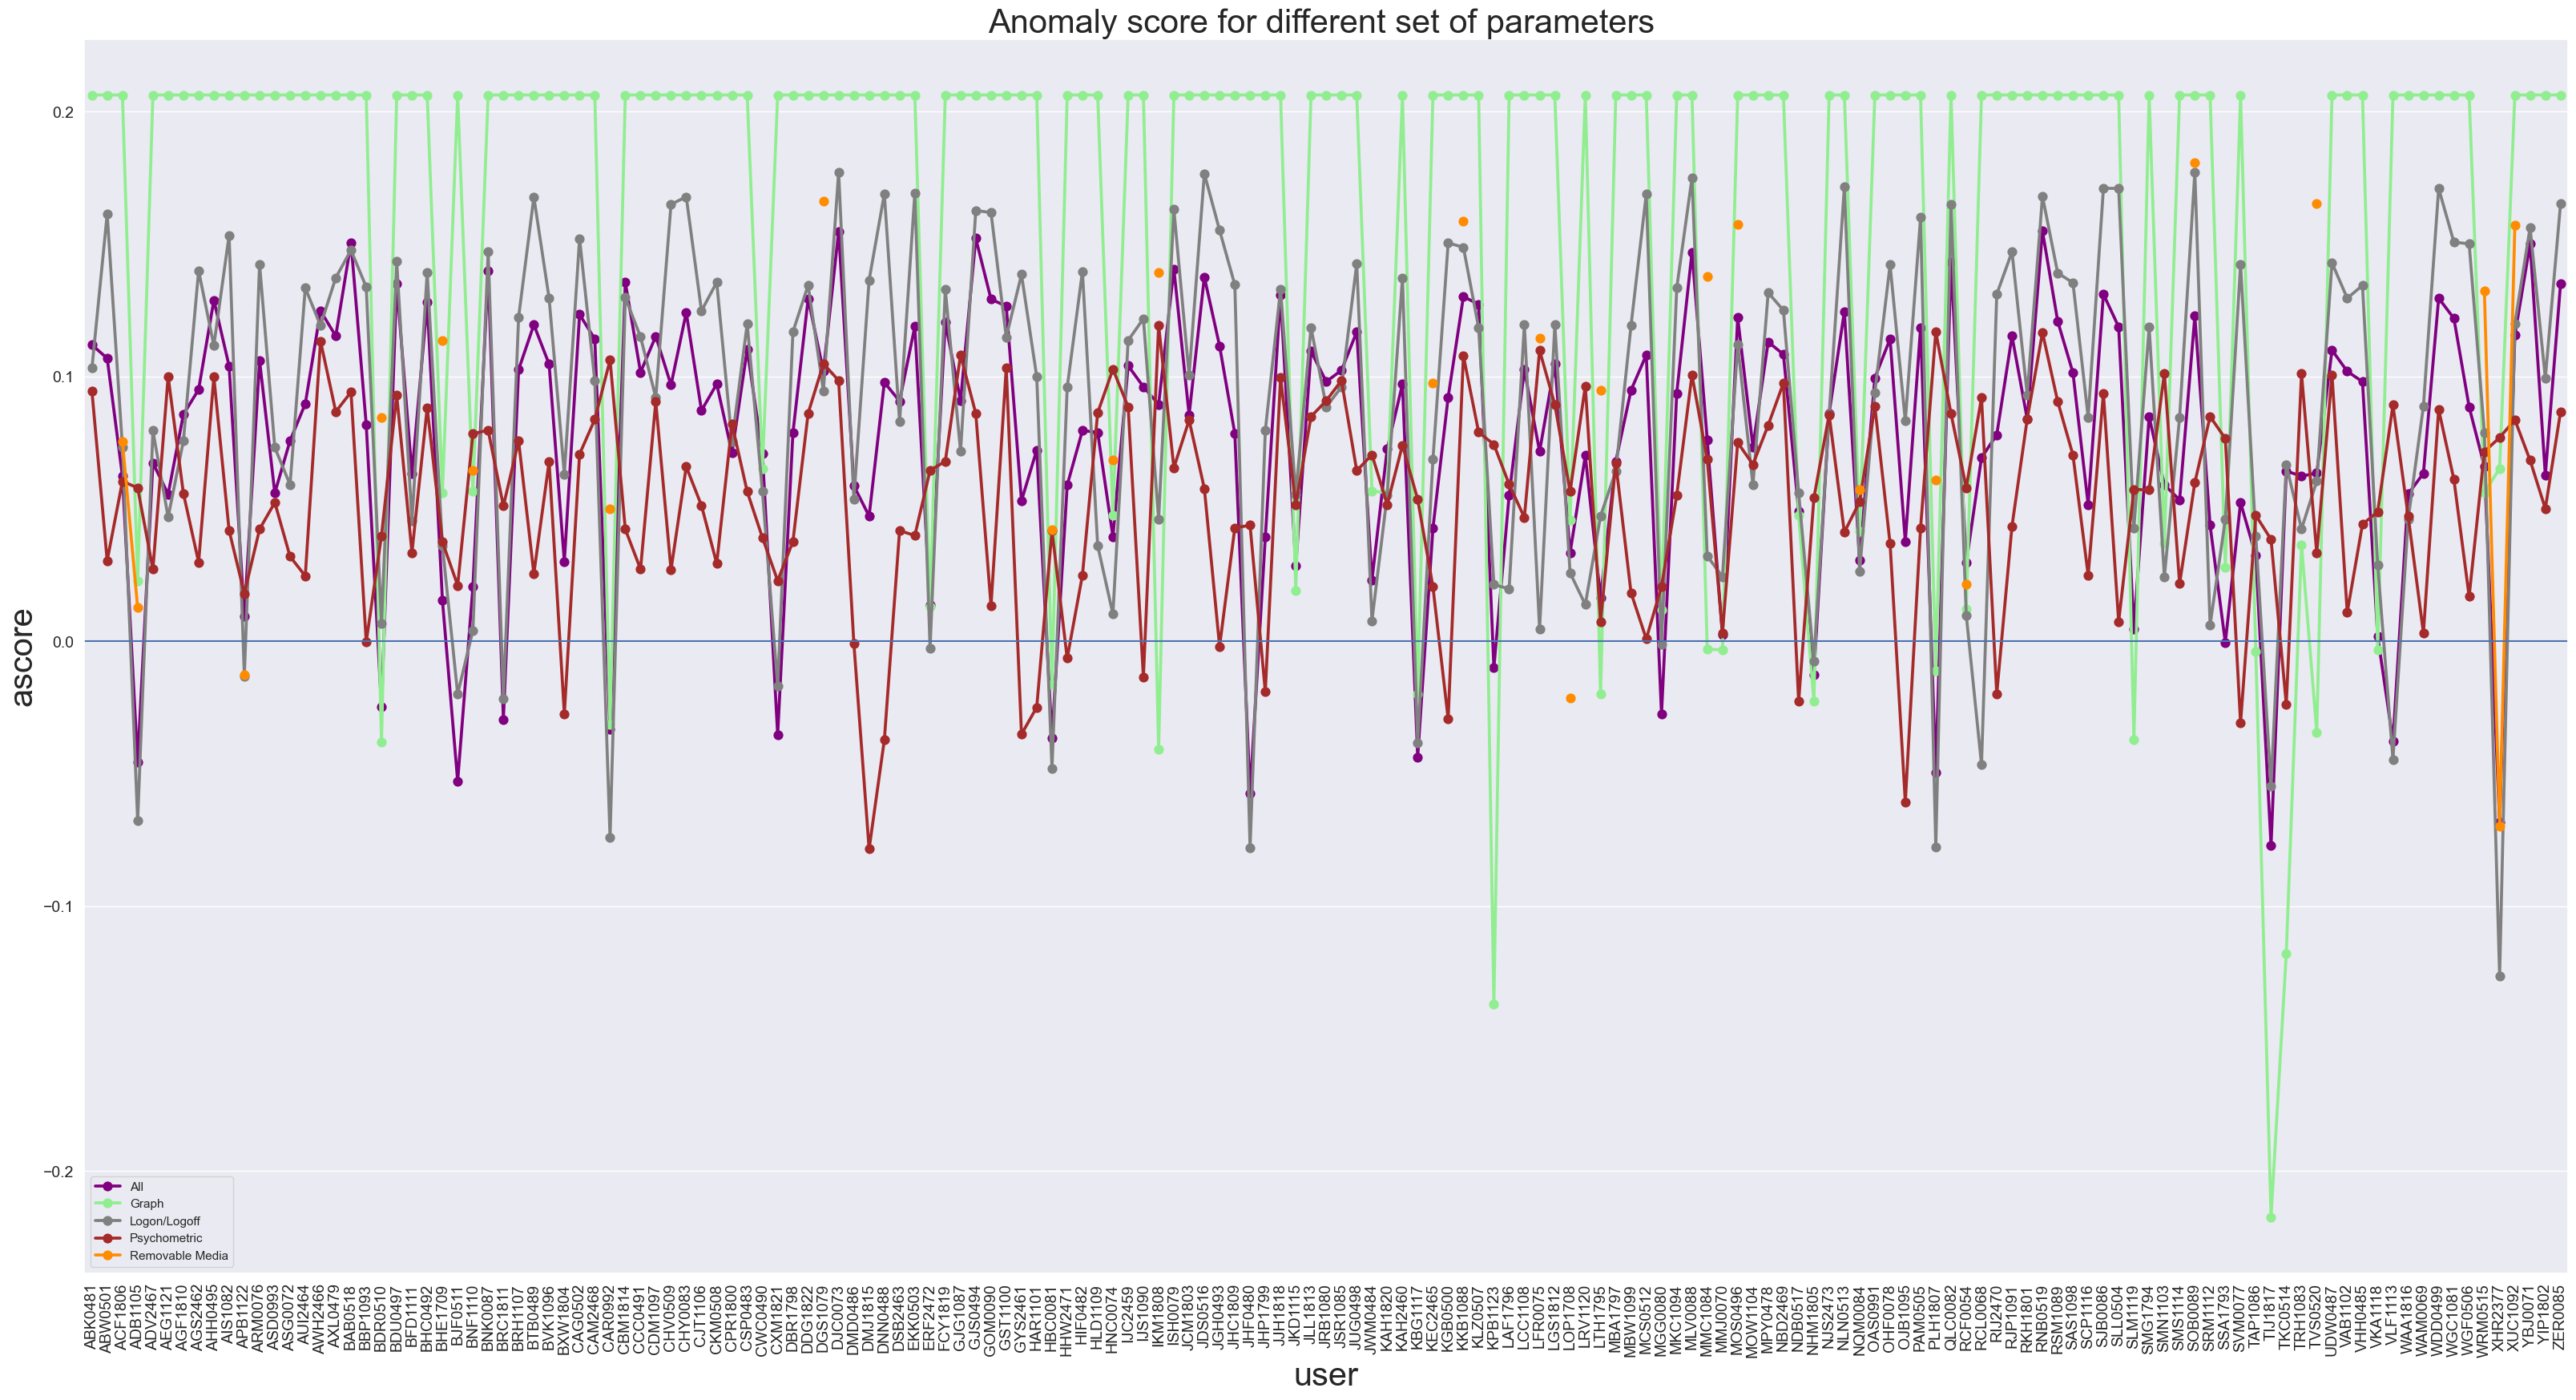

In [199]:
f, ax = plt.subplots(figsize = (40,20))
x_col='user'
y_col = 'ascore'
sns.set_theme(style="darkgrid")
sns.pointplot(ax=ax,x=x_col,y=y_col,data=all_parameters_result,color='purple')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=graph_result,color='lightgreen')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=user_log_result,color='grey')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=psychometric_result,color='brown')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=device_file_full_result,color='darkorange')

ax.legend(handles=ax.lines[::len(all_parameters_result)+1], labels=["All","Graph","Logon/Logoff","Psychometric","Removable Media"])
ax.axhline(0, ls='-')
ax.set_title('Anomaly score for different set of parameters ', size = 30)
plt.rcParams["axes.labelsize"] = 30
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

## User-pc node degree relationship graph (SNA) - Bar chart Anomaly Visualization

Text(0.5, 1.0, 'PC count distribution of users')

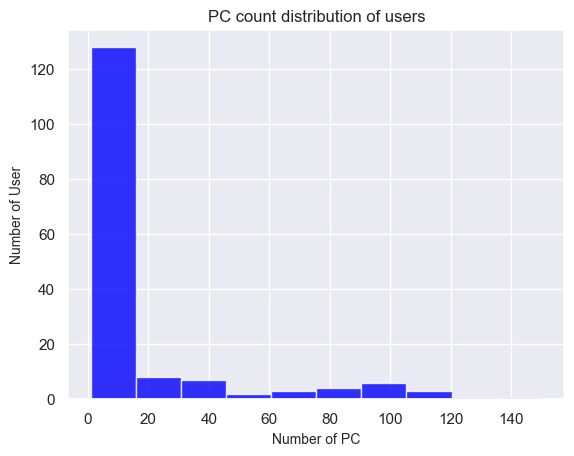

In [145]:
user_pc
# node degree from the graph analysis
plt.hist(user_pc.pc_count, alpha=0.8, color = 'blue');
plt.xlabel('Number of PC', size =10)
plt.ylabel('Number of User', size = 10)
plt.title('PC count distribution of users', size=12)

In [146]:
user_pc.loc[user_pc['pc_count'] > 40]

user  pc_count
3    ADB1105        44
19   BDR0510        94
23   BHE1709       102
34   CAR0992        59
55   ERF2472        85
..       ...       ...
143  TIJ1817       150
145  TRH1083        41
146  TVS0520        64
150  VKA1118       107
157  WRM0515       102

[23 rows x 2 columns]

## Visualization - File transfers per user

In [147]:
file_stats_new
import seaborn as sns

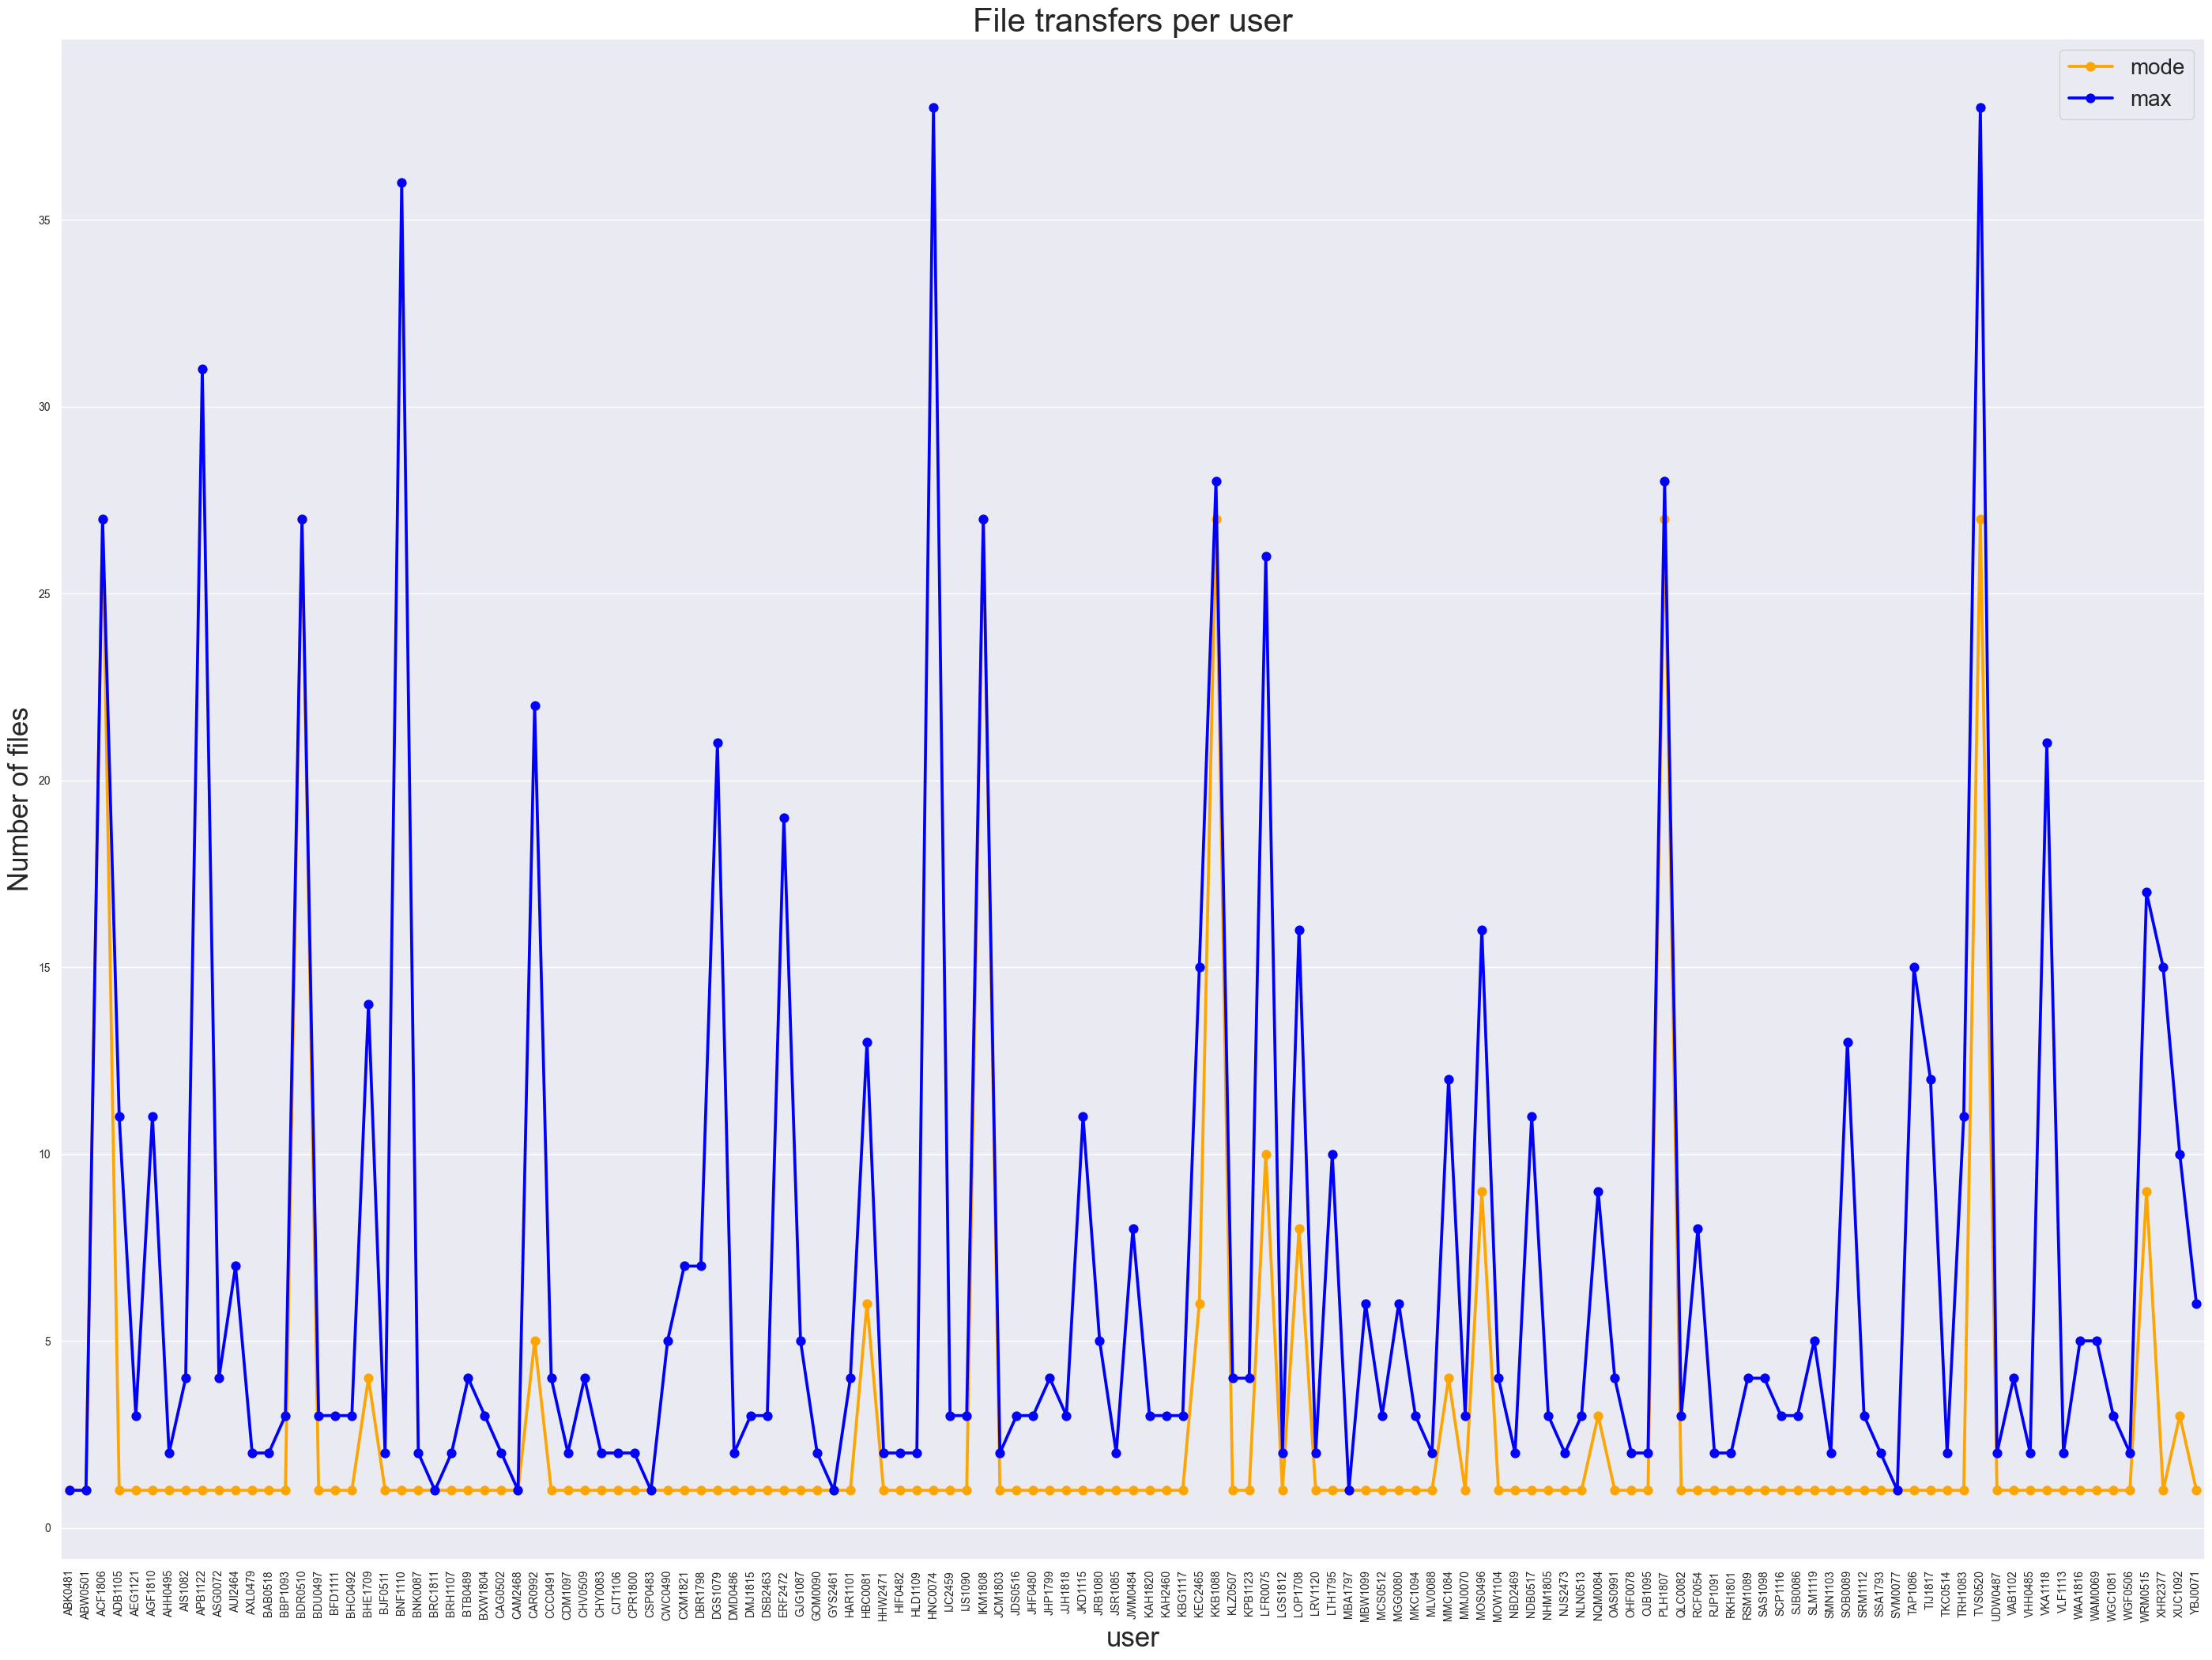

In [148]:
f, ax = plt.subplots(figsize = (35,25))
x_col='user'

sns.pointplot(ax=ax,x=x_col,y='mode_transfers_per_user',data=file_stats_new, color='orange')
sns.pointplot(ax=ax,x=x_col,y='max_transfers_per_user',data=file_stats_new,color='blue')

ax.legend(handles=ax.lines[::len(files_stats)+1], labels=["mode", "max"], fontsize = 20)

ax.set_title('File transfers per user', size = 30)
plt.rcParams["axes.labelsize"] = 25
plt.ylabel("Number of files")
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
# plt.legend(fontsize=20)
plt.show()


# Visualization for the Isolated Forest Anomaly Detection

In [149]:
log_on_off_stats
device_full
psychometric_users_tidy
df_final


user  on_min_ts  on_max_ts  on_mode_ts  on_mean_ts  off_min_ts  \
0    ABK0481      27000      28080       28080       25200       56520   
1    ABW0501      26100      27360       27000       25200       62640   
2    ACF1806      25200      48164       26100       28800       54240   
3    ADB1105       2457      85830       26340       25200        3132   
4    ADV2467      32400      33540       33300       32400       65460   
..       ...        ...        ...         ...         ...         ...   
158  XHR2377       1913      77373       33300       39600       13099   
159  XUC1092      30600      32460       31920       28800       62520   
160  YBJ0071      28800      32640       29640       28800       62700   
161  YIP1802      25200      26220       26220       25200       54780   
162  ZER0085      26100      27300       27300       25200       62700   

     off_max_ts  off_mode_ts  off_mean_ts  pc_count   O   C   E   A   N  
0         57600        56520        54000         1  43  41  20  40  29  
1         63900        62880        61200         1  15  34  44  39  25  
2         55800        54420        54000         1  42  20  40  16  26  
3         72797        58500        50400        44  39  38  42  37  21  
4         66600        65520        64800         1  42  39  10  15  27  
..          ...          ...          ...       ...  ..  ..  ..  ..  ..  
158       85127        65700        61200        39  36  15  22  22  35  
159       64800        63900        61200         1  33  25  41  29  32  
160       66600        64980        61200         1  42  14  35  20  30  
161       55680        54840        54000         1  23  45  26  41  35  
162       63900        63000        61200         1  39  37  38  22  23  

[163 rows x 15 columns]

In [150]:
user_log_result

user    ascore
0    ABK0481  0.103165
1    ABW0501  0.161335
2    ACF1806  0.073391
3    ADB1105 -0.067788
4    ADV2467  0.079553
..       ...       ...
158  XHR2377 -0.126391
159  XUC1092  0.120009
160  YBJ0071  0.156263
161  YIP1802  0.099359
162  ZER0085  0.165342

[163 rows x 2 columns]

In [151]:
device_file_full_result

user    ascore
0   ACF1806  0.075507
1   ADB1105  0.012650
2   APB1122 -0.012650
3   BDR0510  0.084507
4   BHE1709  0.113616
..      ...       ...
21  SOB0089  0.180786
22  TVS0520  0.165321
23  WRM0515  0.132190
24  XHR2377 -0.069765
25  XUC1092  0.157153

[26 rows x 2 columns]

In [152]:
psychometric_result

user    ascore
0    LOP1708  0.056549
1    BRH1107  0.075633
2    OAS0991  0.088754
3    UDW0487  0.100700
4    SLM1119  0.057382
..       ...       ...
158  VAB1102  0.010871
159  MMJ0070  0.003208
160  BNF1110  0.078412
161  ISH0079  0.065550
162  VKA1118  0.048919

[163 rows x 2 columns]

In [153]:
graph_result

user    ascore
0    ABK0481  0.206309
1    ABW0501  0.206309
2    ACF1806  0.206309
3    ADB1105  0.022831
4    ADV2467  0.206309
..       ...       ...
158  XHR2377  0.065270
159  XUC1092  0.206309
160  YBJ0071  0.206309
161  YIP1802  0.206309
162  ZER0085  0.206309

[163 rows x 2 columns]

In [154]:
all_parameters_result

user    ascore
0    ABK0481  0.111952
1    ABW0501  0.106862
2    ACF1806  0.062429
3    ADB1105 -0.045544
4    ADV2467  0.067362
..       ...       ...
158  XHR2377 -0.068217
159  XUC1092  0.115587
160  YBJ0071  0.150102
161  YIP1802  0.062718
162  ZER0085  0.135114

[163 rows x 2 columns]

array([[<Axes: title={'center': 'ascore'}>]], dtype=object)

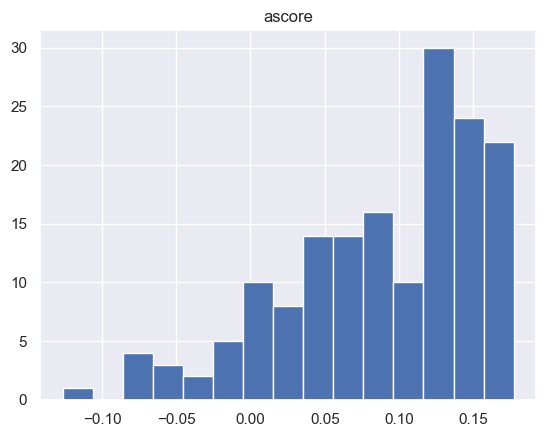

In [155]:
#user_log_result - hist
user_log_result.hist(bins = 15)

array([[<Axes: title={'center': 'ascore'}>]], dtype=object)

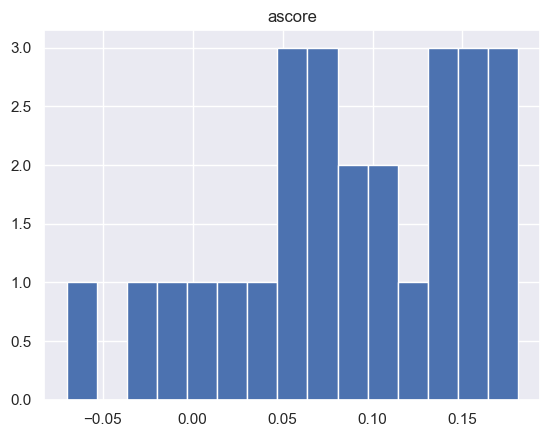

In [156]:
device_file_full_result.hist(bins = 15)

array([[<Axes: title={'center': 'ascore'}>]], dtype=object)

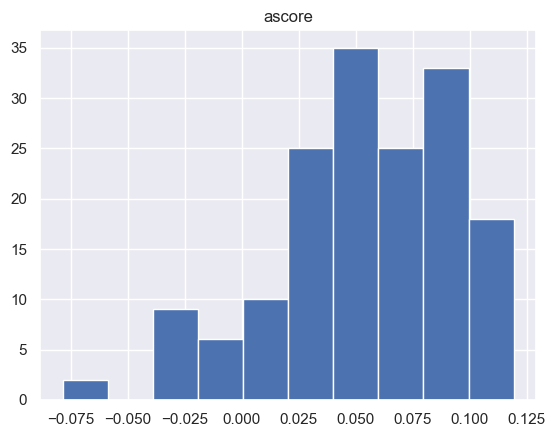

In [157]:
psychometric_result.hist()

array([[<Axes: title={'center': 'ascore'}>]], dtype=object)

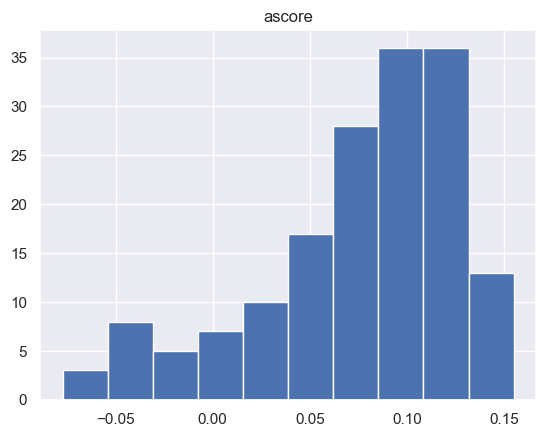

In [158]:
all_parameters_result.hist()

array([[<Axes: title={'center': 'ascore'}>]], dtype=object)

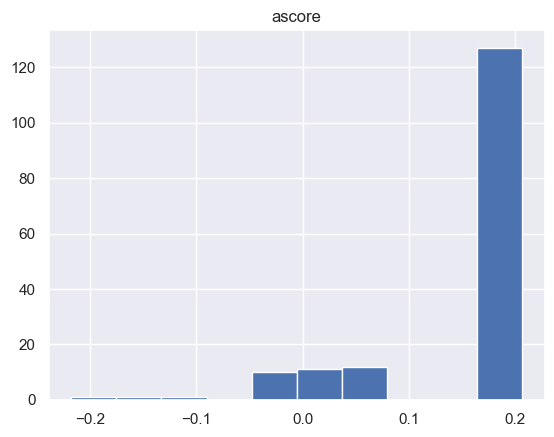

In [159]:
graph_result.hist()

# Visualizing anomalous users

## All parameters combined

array([[<Axes: title={'center': 'ascore'}>]], dtype=object)

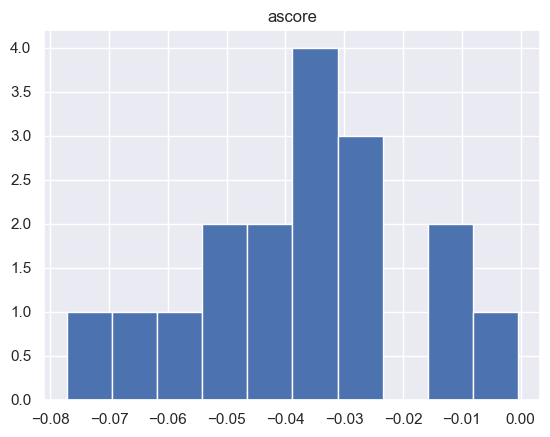

In [160]:
all_parameters_result.loc[all_parameters_result['ascore'] < 0].hist()

In [161]:
threat_users_all_params = all_parameters_result.loc[all_parameters_result['ascore'] < -0.065]
threat_users_all_params

user    ascore
143  TIJ1817 -0.077162
158  XHR2377 -0.068217

In [162]:
all_parameters[all_parameters.user.isin(threat_users_all_params.user)]

user  on_min_ts  on_max_ts  on_mode_ts  on_mean_ts  off_min_ts  \
143  TIJ1817        168      86355       30600       36000         463   
158  XHR2377       1913      77373       33300       39600       13099   

     off_max_ts  off_mode_ts  off_mean_ts  pc_count   O   C   E   A   N  
143       67500        66600        54000       150  24  46  22  47  30  
158       85127        65700        61200        39  36  15  22  22  35

In [163]:
all_parameters.on_max_ts.median()

32220.0

## Device/File

array([[<Axes: title={'center': 'ascore'}>]], dtype=object)

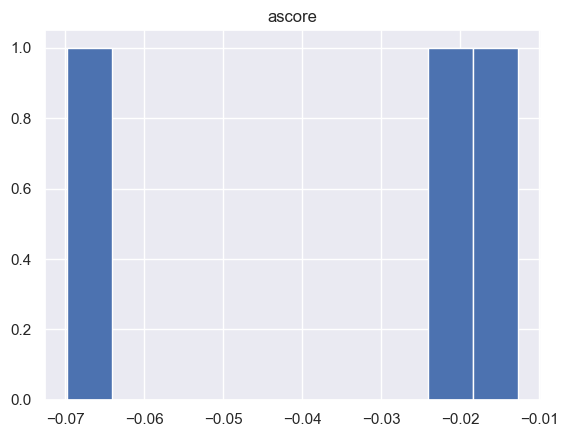

In [164]:
device_file_full_result.loc[device_file_full_result['ascore'] < 0].hist()

In [165]:
threat_users_device_file = device_file_full_result.loc[device_file_full_result['ascore'] <= -0]
threat_users_device_file

user    ascore
2   APB1122 -0.012650
14  LOP1708 -0.021349
24  XHR2377 -0.069765

In [166]:
device_full[device_full.user.isin(threat_users_device_file.user)]

user  con_min_ts  con_max_ts  con_mode_ts  con_mean_ts  dcon_min_ts  \
2   APB1122       28269       71400        52639        46800        28269   
14  LOP1708       25471       54108        53420        36000        25471   
24  XHR2377       32573       85483        61616        46800        32573   

    dcon_max_ts  dcon_mode_ts  dcon_mean_ts  file_mode  file_max  
2         71400         52639         46800         27        27  
14        54108         53420         36000         27        27  
24        85483         61616         46800          1         4

In [167]:
device_full.file_mode.mean()


3.1153846153846154

In [168]:
device_full.file_max.mean()


8.038461538461538

## Logon/logoff

array([[<Axes: title={'center': 'ascore'}>]], dtype=object)

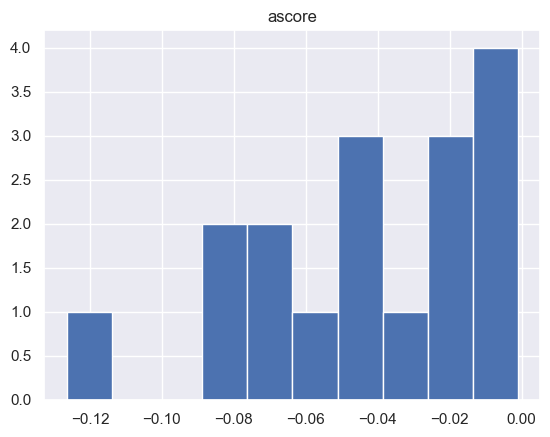

In [169]:
user_log_result
user_log_result.loc[user_log_result['ascore'] < 0].hist()

In [170]:
threat_users_log = user_log_result.loc[user_log_result['ascore'] <= -0.04]
threat_users_log

user    ascore
3    ADB1105 -0.067788
34   CAR0992 -0.074090
63   HBC0081 -0.047877
76   JHF0480 -0.078056
121  PLH1807 -0.077659
124  RCL0068 -0.046573
143  TIJ1817 -0.054568
151  VLF1113 -0.044577
158  XHR2377 -0.126391

In [171]:
log_on_off_stats[log_on_off_stats.user.isin(threat_users_log.user)]

user  on_min_ts  on_max_ts  on_mode_ts  on_mean_ts  off_min_ts  \
3    ADB1105       2457      85830       26340       25200        3132   
34   CAR0992       2936      86243       26100       32400          66   
63   HBC0081       5639      86375       29700       36000        6802   
76   JHF0480        100      86328       27900       25200        2051   
121  PLH1807       5291      86393       26100       25200        1265   
124  RCL0068      24300      25920       25200       21600       64080   
143  TIJ1817        168      86355       30600       36000         463   
151  VLF1113        385      85864       28260       25200        4943   
158  XHR2377       1913      77373       33300       39600       13099   

     off_max_ts  off_mode_ts  off_mean_ts  
3         72797        58500        50400  
34        82384        58500        50400  
63        81264        65760        57600  
76        85088        56700        46800  
121       82306        54900        50400  
124       65700        64800        61200  
143       67500        66600        54000  
151       85391        72420        61200  
158       85127        65700        61200

In [172]:
log_on_off_stats.on_max_ts.mean()

42601.815950920245

In [173]:
log_on_off_stats.on_max_ts.median()

32220.0

## User-pc interactions

array([[<Axes: title={'center': 'ascore'}>]], dtype=object)

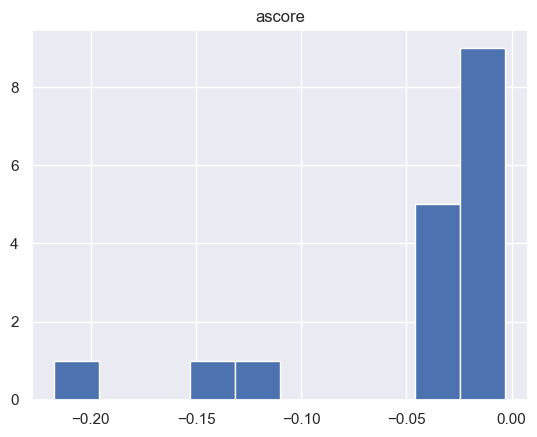

In [174]:
graph_result.loc[graph_result['ascore'] < 0].hist()

In [175]:
threat_graph = graph_result.loc[graph_result['ascore'] < -0.25]
threat_graph

Empty DataFrame
Columns: [user, ascore]
Index: []

In [176]:
user_pc[user_pc.user.isin(threat_graph.user)]

Empty DataFrame
Columns: [user, pc_count]
Index: []

In [177]:
user_pc.pc_count.mean()

15.239263803680982

In [178]:
user_pc.pc_count.median()

1.0

## Psychometric

Can't rely on this. Use min threshold for every feature O C E A N!

array([[<Axes: title={'center': 'ascore'}>]], dtype=object)

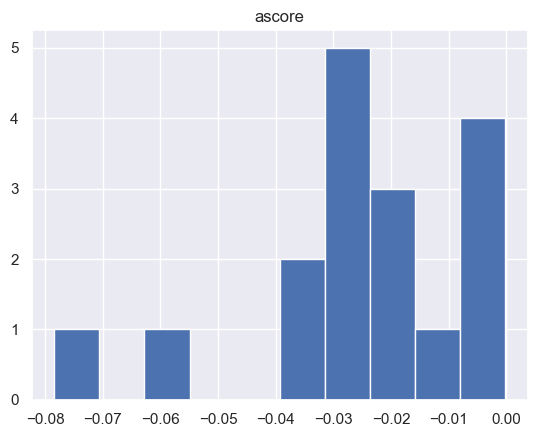

In [179]:
#psychometric_users_tidy
psychometric_result.loc[psychometric_result['ascore'] < 0].hist()

In [180]:
threat_psycho = psychometric_result.loc[psychometric_result['ascore'] <= -0.04]
threat_psycho

user    ascore
41  OJB1095 -0.060716
98  DMJ1815 -0.078418

In [181]:
psychometric_users_tidy[psychometric_users_tidy.user_id.isin(threat_psycho.user)]

employee_name  user_id   O   C   E   A   N
41  Ocean Justine Bradshaw  OJB1095  12  24  22  50  20
98     Dacey Maisie Juarez  DMJ1815  40  11  48  42  40

In [182]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

psychometric_users_tidy.N.max()
psychometric_users_tidy.N.min()
psychometric_users_tidy.N.mean()


28.84049079754601

In [183]:
log_on_off_stats

user  on_min_ts  on_max_ts  on_mode_ts  on_mean_ts  off_min_ts  \
0    ABK0481      27000      28080       28080       25200       56520   
1    ABW0501      26100      27360       27000       25200       62640   
2    ACF1806      25200      48164       26100       28800       54240   
3    ADB1105       2457      85830       26340       25200        3132   
4    ADV2467      32400      33540       33300       32400       65460   
..       ...        ...        ...         ...         ...         ...   
158  XHR2377       1913      77373       33300       39600       13099   
159  XUC1092      30600      32460       31920       28800       62520   
160  YBJ0071      28800      32640       29640       28800       62700   
161  YIP1802      25200      26220       26220       25200       54780   
162  ZER0085      26100      27300       27300       25200       62700   

     off_max_ts  off_mode_ts  off_mean_ts  
0         57600        56520        54000  
1         63900        62880        61200  
2         55800        54420        54000  
3         72797        58500        50400  
4         66600        65520        64800  
..          ...          ...          ...  
158       85127        65700        61200  
159       64800        63900        61200  
160       66600        64980        61200  
161       55680        54840        54000  
162       63900        63000        61200  

[163 rows x 9 columns]

In [184]:
log_on_off_stats_extract = log_on_off_stats[['user', 'on_min_ts', 'on_max_ts']]

In [185]:
log_on_off_stats_extract

user  on_min_ts  on_max_ts
0    ABK0481      27000      28080
1    ABW0501      26100      27360
2    ACF1806      25200      48164
3    ADB1105       2457      85830
4    ADV2467      32400      33540
..       ...        ...        ...
158  XHR2377       1913      77373
159  XUC1092      30600      32460
160  YBJ0071      28800      32640
161  YIP1802      25200      26220
162  ZER0085      26100      27300

[163 rows x 3 columns]

In [186]:
log_on_off_stats_extract_input = log_on_off_stats_extract.drop(['user'], axis = 1)
log_on_off_stats_extract_input

on_min_ts  on_max_ts
0        27000      28080
1        26100      27360
2        25200      48164
3         2457      85830
4        32400      33540
..         ...        ...
158       1913      77373
159      30600      32460
160      28800      32640
161      25200      26220
162      26100      27300

[163 rows x 2 columns]

In [187]:
forest = IsolationForest(bootstrap=False, contamination=0.05, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(log_on_off_stats_extract_input)

IsolationForest(contamination=0.05, n_jobs=1)

In [188]:
# Anomaly score
log_on_off_stats_extract_input_ascore = forest.decision_function(log_on_off_stats_extract_input)
log_on_off_stats_extract_input_ascore[:10]

array([ 0.18222143,  0.19943216,  0.12600922, -0.01881831,  0.10016496,
        0.16201036,  0.08693617,  0.10548425,  0.11809752,  0.15498304])

In [189]:
log_on_off_stats_extract_input_result = pd.DataFrame()

log_on_off_stats_extract_input_result['user'] = log_on_off_stats_extract['user']
log_on_off_stats_extract_input_result['ascore'] = log_on_off_stats_extract_input_ascore
log_on_off_stats_extract_input_result

user    ascore
0    ABK0481  0.182221
1    ABW0501  0.199432
2    ACF1806  0.126009
3    ADB1105 -0.018818
4    ADV2467  0.100165
..       ...       ...
158  XHR2377 -0.132141
159  XUC1092  0.114536
160  YBJ0071  0.134729
161  YIP1802  0.134217
162  ZER0085  0.192580

[163 rows x 2 columns]

In [190]:
data_merged = log_on_off_stats_extract_input_result.merge(log_on_off_stats_extract, how = 'inner')
data_merged
data_merged.to_csv('C:/Users/Piyush/Documents/NCI Notes/AIML/Project/CertInsiderDS/r4.2/CERT/datamerged.csv')

user    ascore  on_min_ts  on_max_ts
0    ABK0481  0.182221      27000      28080
1    ABW0501  0.199432      26100      27360
2    ACF1806  0.126009      25200      48164
3    ADB1105 -0.018818       2457      85830
4    ADV2467  0.100165      32400      33540
..       ...       ...        ...        ...
158  XHR2377 -0.132141       1913      77373
159  XUC1092  0.114536      30600      32460
160  YBJ0071  0.134729      28800      32640
161  YIP1802  0.134217      25200      26220
162  ZER0085  0.192580      26100      27300

[163 rows x 4 columns]

In [191]:
log_on_off_stats_extract_input_result.loc[log_on_off_stats_extract_input_result['ascore'] < 0]

user    ascore
3    ADB1105 -0.018818
24   BJF0511 -0.000722
34   CAR0992 -0.016472
55   ERF2472 -0.046278
63   HBC0081 -0.042044
103  MGG0080 -0.056657
121  PLH1807 -0.041171
124  RCL0068 -0.061398
158  XHR2377 -0.132141

In [192]:
log_on_off_stats

user  on_min_ts  on_max_ts  on_mode_ts  on_mean_ts  off_min_ts  \
0    ABK0481      27000      28080       28080       25200       56520   
1    ABW0501      26100      27360       27000       25200       62640   
2    ACF1806      25200      48164       26100       28800       54240   
3    ADB1105       2457      85830       26340       25200        3132   
4    ADV2467      32400      33540       33300       32400       65460   
..       ...        ...        ...         ...         ...         ...   
158  XHR2377       1913      77373       33300       39600       13099   
159  XUC1092      30600      32460       31920       28800       62520   
160  YBJ0071      28800      32640       29640       28800       62700   
161  YIP1802      25200      26220       26220       25200       54780   
162  ZER0085      26100      27300       27300       25200       62700   

     off_max_ts  off_mode_ts  off_mean_ts  
0         57600        56520        54000  
1         63900        62880        61200  
2         55800        54420        54000  
3         72797        58500        50400  
4         66600        65520        64800  
..          ...          ...          ...  
158       85127        65700        61200  
159       64800        63900        61200  
160       66600        64980        61200  
161       55680        54840        54000  
162       63900        63000        61200  

[163 rows x 9 columns]

In [193]:
all_parameters

user  on_min_ts  on_max_ts  on_mode_ts  on_mean_ts  off_min_ts  \
0    ABK0481      27000      28080       28080       25200       56520   
1    ABW0501      26100      27360       27000       25200       62640   
2    ACF1806      25200      48164       26100       28800       54240   
3    ADB1105       2457      85830       26340       25200        3132   
4    ADV2467      32400      33540       33300       32400       65460   
..       ...        ...        ...         ...         ...         ...   
158  XHR2377       1913      77373       33300       39600       13099   
159  XUC1092      30600      32460       31920       28800       62520   
160  YBJ0071      28800      32640       29640       28800       62700   
161  YIP1802      25200      26220       26220       25200       54780   
162  ZER0085      26100      27300       27300       25200       62700   

     off_max_ts  off_mode_ts  off_mean_ts  pc_count   O   C   E   A   N  
0         57600        56520        54000         1  43  41  20  40  29  
1         63900        62880        61200         1  15  34  44  39  25  
2         55800        54420        54000         1  42  20  40  16  26  
3         72797        58500        50400        44  39  38  42  37  21  
4         66600        65520        64800         1  42  39  10  15  27  
..          ...          ...          ...       ...  ..  ..  ..  ..  ..  
158       85127        65700        61200        39  36  15  22  22  35  
159       64800        63900        61200         1  33  25  41  29  32  
160       66600        64980        61200         1  42  14  35  20  30  
161       55680        54840        54000         1  23  45  26  41  35  
162       63900        63000        61200         1  39  37  38  22  23  

[163 rows x 15 columns]

In [194]:
device_conn_stats_sec

user  min_ts  max_ts  mode_ts  mean_ts
0   ACF1806   25403   55103    46392    36000
1   ADB1105   25377   85130    29677    39600
2   APB1122   28269   71400    52639    46800
3   BDR0510   28677   80254    34011    43200
4   BHE1709   30232   66325    64874    43200
..      ...     ...     ...      ...      ...
21  SOB0089   28932   64342    45080    43200
22  TVS0520   28083   65499    48253    43200
23  WRM0515   28114   64967    30122    43200
24  XHR2377   32573   85483    61616    46800
25  XUC1092   31449   62705    44907    43200

[26 rows x 5 columns]

## Final Model using Isolated Forest on All Parameters to generate a anomaly-scatterplot

In [195]:
import numpy as np
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib import pyplot
import seaborn




def anomaly_scatterplot(y,z, xlabtitle, ylabtitle):
    x = all_parameters['user']
    df = pd.concat([x, y, z], axis=1)
    df_matrix = df.drop(['user'], axis = 1)
    forest = IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
    forest.fit(df_matrix)
    ascore = forest.decision_function(df_matrix)
    result = pd.DataFrame()
    result['user'] = x
    result_full = pd.merge(result, df, on = 'user')
    result_full['ascore'] = ascore
    result_full['Anomaly'] = np.where(result_full['ascore'] > 0, 1, -1)
    sns.set(rc={'figure.figsize':(12,10)})
    plot = sns.scatterplot(data=result_full, x = y, y = z, s = 125, hue = result_full['Anomaly'], palette=['red','green'])
    plt.xlabel(xlabtitle, fontsize = 18)
    plt.ylabel(ylabtitle, fontsize = 18)
    plt.legend(bbox_to_anchor=(1.01, 0.5),borderaxespad=0, title = "Anomaly" )
    plt.title('Anomaly Scatterplot', fontsize=20)
    plt.tight_layout()

    

    


    return plot
    
    


<Axes: title={'center': 'Anomaly Scatterplot'}, xlabel='Minimum Login Time (in sec)', ylabel='Minimum Logoff Time (in sec)'>

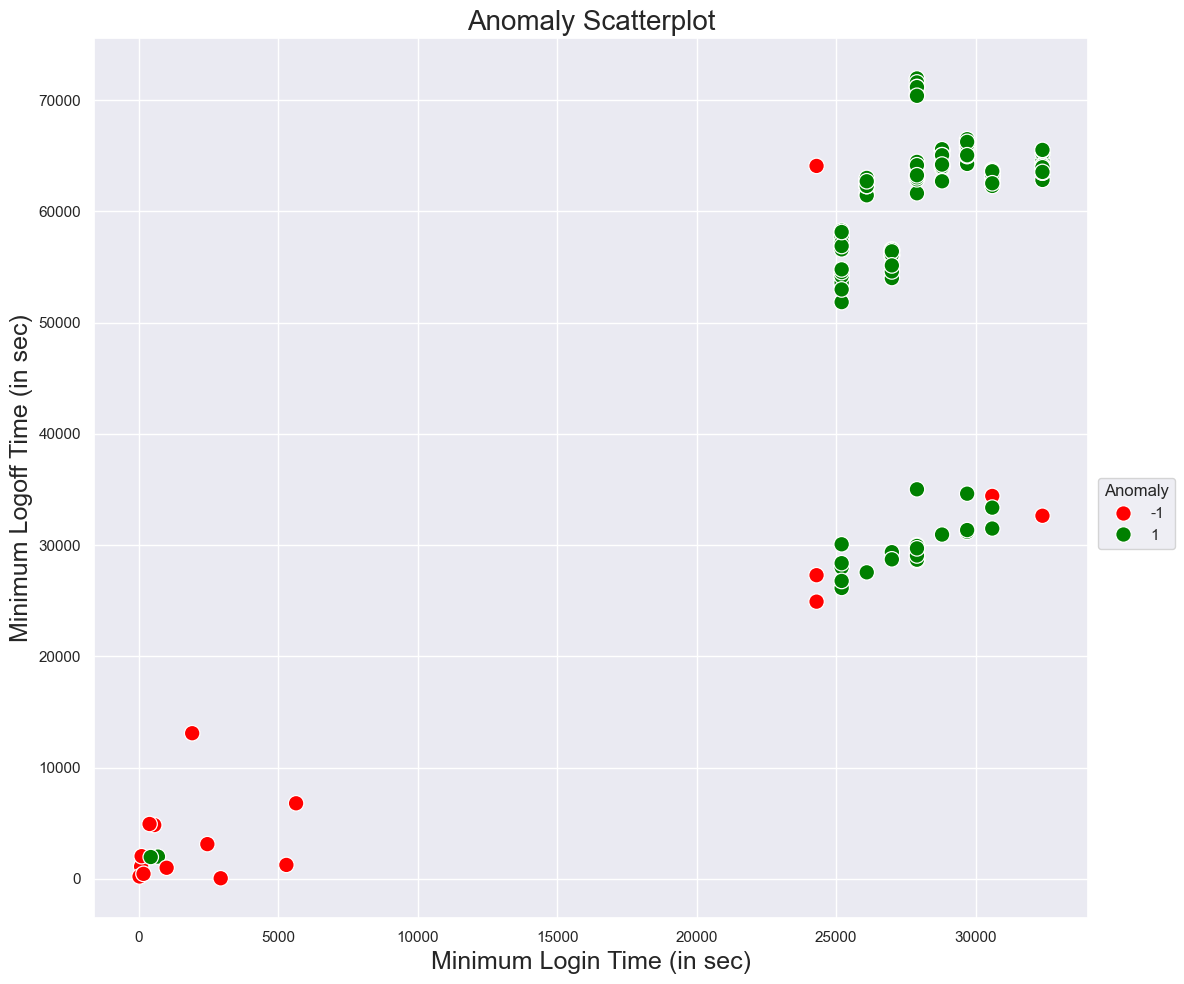

In [196]:
anomaly_scatterplot(all_parameters['on_min_ts'], all_parameters['off_min_ts'], 'Minimum Login Time (in sec)', 'Minimum Logoff Time (in sec)')